# TASK 1

### Description of the Dataset (100 words)

This dataset is a collection of global retail company, shows the transaction details from a retail operation, linking customers, orders, and products through sales records. It includes:

Customer information ('Customer ID', 'Customer Name', 'Segment','Country', 'City', 'State', 'Postal Code', 'Region'), 

Order specifics ('Order ID', 'Order Date', 'Ship Date', 'Ship Mode'), where 'Order Date' and 'Ship Date' are incorrectly categorized and should be in Datetime format.

Product attributes ('Product ID', 'Category', 'Sub-Category', 'Product Name'), 

Sales transactions ('Sales', 'Quantity', 'Discount', 'Profit'), which should be in Numeric format.

There are some challenges which need to be addressed before analysis can be conducted. Among these challenges are missing values, typos, also errors that are scattered around the datas. Missing values can impact the accuracy of any analysis, leading to incorrect conclusions. 

Typos, particularly in text-based fields such as 'Product Name' or 'Customer Name', create inconsistencies which complicate categorization and analysis. 

Errors, which manifest as incorrect entries in numerical fields like 'Sales', 'Quantity', 'Discount', 'Profit', or inaccuracies in 'Order Date' and 'Ship Date' fields, can mislead analysis then affect the reliability of any insights from the dataset. 

Addressing these issues is very important to ensure the integrity of the analysis, requiring a data cleaning process to identify these imperfections, to enhance the dataset's quality and reliability for analytical tasks.

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
pd.set_option('display.max_colwidth', 160)
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_file = "sample-superstore_2023_T3.csv"
df = pd.read_csv(input_file, header = 0)
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7773,CA-2016-108196,25/11/2016,12/02/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,Est,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978
1,684,US-2017-168116,11/04/2017,11/04/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,"""27217""",South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2,9775,CA-2014-169019,26/07/2014,30/07/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3,3012,CA-2017-134845,17/04/2017,24/04/2017,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.98
4,4992,US-2017-122714,12/07/2017,13/12/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
5,3152,CA-2015-147830,15/12/2015,18/12/2015,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,43055,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,Two,0.7,"""-2639.9912"""
6,5311,CA-2017-131254,19/11/2017,21/11/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,1525.188,6,0.8,-2287.782
7,9640,CA-2015-116638,28/01/2015,NaN,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Frnture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,4297.644,Thirteen,0.4,NaN
8,1200,CA-2016-130946,04/08/2016,04/12/2016,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9,2698,CA-2014-145317,18/03/2014,23/03/2014,Standard Class,SM-20320,Sean Miller,Home Office,NaN,Jacksonville,...,32216,Southh,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,6,0.5,-1811.0784


In [3]:
len(df)

9994

In [4]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [5]:
#Check all missing value in dataset
df_missing_values= df.isnull().sum()
df_missing_values

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

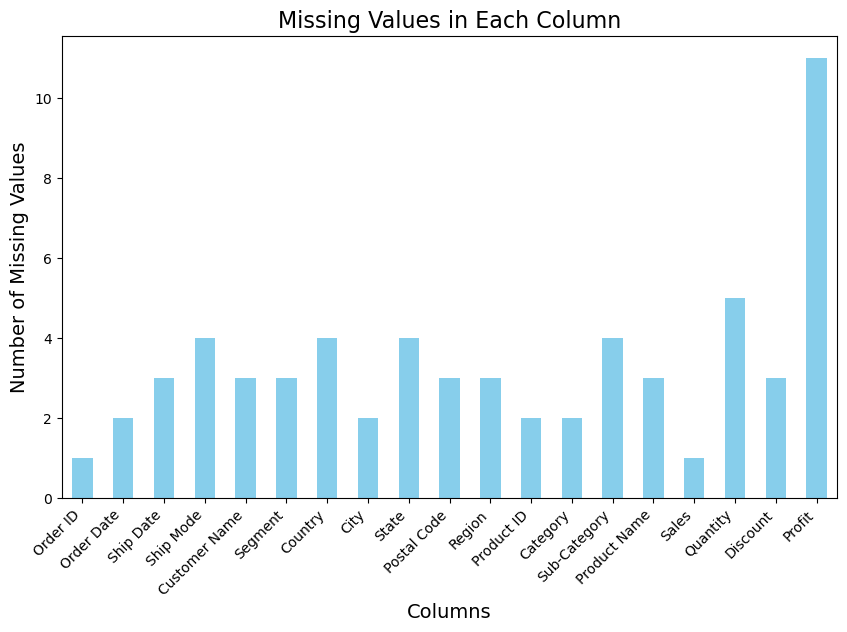

In [6]:
df_missing_values = df_missing_values[df_missing_values > 0]

plt.figure(figsize=(10, 6))
df_missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

## ER  Diagram

Relationships:

Customer to Order: One-to-Many. A customer can place multiple orders, but each order is placed by a single customer."Customer ID" should be a foreign key (FK) in the "Order" entity.

Order to Sales: One-to-Many. An order can include multiple products (sales), but each sale row is associated with one order.

Product to Sales: One-to-Many. A product can be part of multiple sales (orders), but each sale row references one specific product.

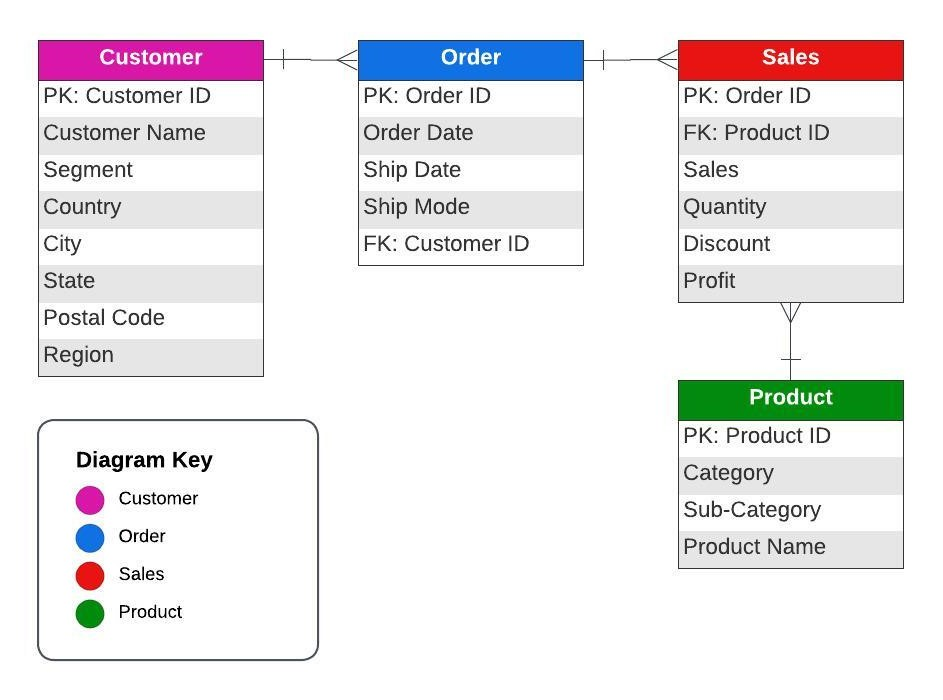

# TASK 2

### Summarization of How to Apply Various Techniques to the Dataset (300 words)

##### Data Cleaning and Preparation: 

Before analysis can commence, need to clean the dataset to be prepared due to several issues. 
Begins with importing necessary libraries such as pandas, NumPy, matplotlib, and seaborn. The initial step involves loading a dataset, followed by preliminary cleaning. This includes handling missing values, correcting data types like converting 'Order Date' and 'Ship Date' to datetime format, and addressing inconsistencies/ errors in the data, such as typos in several columns.

Inconsistencies are everywhere, with notable typos in 'Order Date' and 'Ship Date' columns leading to unrealistic delivery periods, such as 91 days. Furthermore, the date fields are not formatted as datetime, and the 'Quantity' and 'Profit' columns, which should be numerical, are erroneously listed as object data types. This situation complicates any attempts to correct data types without first addressing the missing values.

The initial phase involves segregating dataset (df) into 4 groups: df_Product, df_Sales, df_Customer, and df_Order, and then cleaning each group individually. This stage covers rectifying missing information, adjusting data types, and later merging these cleaned segments into a unified dataset (df1).

##### Tackle missing values:
Apply imputation techniques, filling in gaps with correspondence values from similar data. This step is necessary for the integrity of our dataset.

Correcting date entries is another critical task. Incorrect placements of day and month values can lead to skewed delivery times; therefore, adjustments—such as swapping the day and month—are made to ensure that delivery schedules accurately mirror reality.

After rectifying these preliminary issues, we compile the cleansed data into a comprehensive dataset ready for further analysis. 

##### Outlier Detection and Removal: 

Using statistical methods like the calculation of z-scores, identifies outliers within the dataset is necessary, especially in numerical columns such as 'Sales', 'Quantity', 'Discount', 'Profit'. These outliers are removed to normalize the data distribution and improve the accuracy.

##### Normalization or Scaling: 

To ensure uniformity in the dataset, especially before conducting any form of multivariate analysis, apply scaling techniques to numerical variables. This process ensures that variables are on a similar scale, preventing any one variable from disproportionately influencing the analysis.

##### Descriptive Statistical Analysis: 

After cleaning, performs a descriptive statistical analysis to summarize the central tendencies, dispersion, and shape of the dataset's distributions. This include calculating means, medians, modes, variances, and standard deviations for numerical data, providing a solid understanding of dataset's characteristics.

##### Univariate Analysis: 

The univariate analysis focusing on single variables to understand the individual properties. 

##### Visualization: 

Various data visualizations are to convey findings effectively. This could range from simple line plots and bar charts to more complex visualizations like heatmaps for correlation matrices, or pie charts to illustrate proportional relationships.

# Grouping of Data 

In [7]:
df_Product = df[['Row ID','Product ID', 'Category', 'Sub-Category', 'Product Name']]
df_Sales = df[['Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
df_Customer = df[['Row ID','Customer ID', 'Customer Name', 'Segment','Country', 'City', 'State', 'Postal Code', 'Region']]
df_Order = df[['Row ID','Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID']]

# 1. df_Product group 

In [8]:
df_Product.head(10)

,Row ID,Product ID,Category,Sub-Category,Product Name
0,7773,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print
1,684,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print
2,9775,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System
3,3012,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
4,4992,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System
5,3152,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print
6,5311,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
7,9640,FUR-TA-10000198,Frnture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases
8,1200,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System
9,2698,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit


## df_Product - Handling outliers and missing values

### df_Product Finding Outliers

In [9]:
#Find unique values in df_Product['Category'] 
unique_cat = df_Product['Category'] .unique()
print(unique_cat)

['Technology' 'Office Supplies' 'Frnture' 'Furniture' nan]


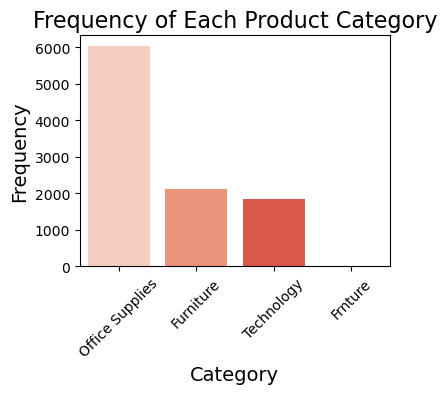

In [10]:
df_Product_category_counts = df_Product['Category'].value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=df_Product_category_counts.index, y=df_Product_category_counts.values, palette='Reds')
plt.title('Frequency of Each Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

<span style="color: blue;"> 'Frnture' value is a typo. </span>

In [11]:
# Replace typos
df_Product['Category']  = df_Product['Category'] .replace({'Frnture': 'Furniture'})
unique_cat = df_Product['Category'] .unique()
print(unique_cat)

['Technology' 'Office Supplies' 'Furniture' nan]


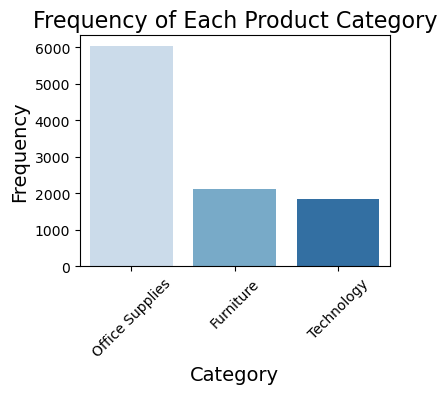

In [12]:
df_Product_category_counts = df_Product['Category'].value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=df_Product_category_counts.index, y=df_Product_category_counts.values, palette='Blues')
plt.title('Frequency of Each Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

In [13]:
#Find unique values in df_Product['Sub-Category'] 
unique_subcat = df_Product['Sub-Category'] .unique()
unique_subcat

array(['Machines', 'Binders', 'Tables', 'Bookcases', nan, 'Appliances',
       'Supplies', 'Chairs', 'Furnishings', 'Phones', 'Storage',
       'Accessories', 'Fasteners', 'Art', 'Envelopes', 'Labels', 'Paper',
       'Copiers'], dtype=object)

<span style="color: blue;"> No strange values. </span>

In [14]:
#Find unique values in df_Product['Product Name'] 
unique_prodname = df_Product['Product Name'] .unique()
len(unique_prodname)

1851

In [15]:
# Show data types of each column in df_Product
print(df_Product.dtypes)

Row ID           int64
Product ID      object
Category        object
Sub-Category    object
Product Name    object
dtype: object


In [16]:
#Check updated missing value in df_Product
df_Product_missing_values = df_Product.isnull().sum()
print(df_Product_missing_values)

Row ID          0
Product ID      2
Category        2
Sub-Category    4
Product Name    3
dtype: int64


### df_Product['Product ID '] missing values

To fill in missing 'Product ID' values with correspond 'Product Name' values in the dataset

In [17]:
#Compare with specified 'Product ID' and 'Product Name' in other rows
Product_missing_id= df_Product.loc[df_Product['Product ID'].isnull(), 'Product Name'].unique()
print(Product_missing_id)

['Laminate Occasional Tables' 'GBC ProClick Punch Binding System']


In [18]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_laminate = df_Product[df_Product['Product Name'] == 'Laminate Occasional Tables'][[
    'Product ID', 'Category','Sub-Category','Product Name']]
print(product_laminate)

           Product ID   Category Sub-Category                Product Name
206               NaN  Furniture       Tables  Laminate Occasional Tables
675   FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables
1063  FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables


In [19]:
#Fill in missing value in 'Product ID' with correspondence 'value with the same 'Product Name'

df_Product.loc[206, 'Product ID'] = 'FUR-TA-10002774'

In [20]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_laminate = df_Product[df_Product['Product Name'] == 'Laminate Occasional Tables'][[
    'Product ID', 'Category','Sub-Category','Product Name']]
print(product_laminate)

           Product ID   Category Sub-Category                Product Name
206   FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables
675   FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables
1063  FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables


In [21]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_gbc = df_Product[df_Product['Product Name'] == 'GBC ProClick Punch Binding System'][[
    'Product ID', 'Category','Product Name']]
print(product_gbc)

           Product ID         Category                       Product Name
9445  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9621  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9622  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
8570  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
377   OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
494               NaN  Office Supplies  GBC ProClick Punch Binding System
7854  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System


In [22]:
#Fill in missing value in 'Product ID' with correspondence 'value with the same 'Product Name'

df_Product.loc[494, 'Product ID'] = 'OFF-BI-10001071'

In [23]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_gbc = df_Product[df_Product['Product Name'] == 'GBC ProClick Punch Binding System'][[
    'Product ID', 'Category','Product Name']]
print(product_gbc)

           Product ID         Category                       Product Name
9445  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9621  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9622  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
8570  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
377   OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
494   OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
7854  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System


### df_Product['Category', 'Sub-Category', 'Product Name'] outliers and missing values

To fill in missing 'Category', 'Sub-Category', 'Product Name' values with correspond 'Product ID' values in the dataset

In [24]:
Product_columns_to_update = ['Category', 'Sub-Category', 'Product Name']

for column in Product_columns_to_update:
    Product_ids_missing_values = df_Product.loc[df_Product[column].isnull(), 'Product ID'].unique()      
    for Product_id in Product_ids_missing_values:
        
        # Check if there's at least one not-null value for this Product ID in the current column
        if not df_Product[df_Product['Product ID'] == Product_id][column].dropna().empty:
            
            # Get the first not-null value 
            value_to_fill = df_Product.loc[df_Product['Product ID'] == Product_id, column].dropna().iloc[0]
            
            # Fill in missing values for Product ID in the current column
            df_Product.loc[df_Product['Product ID'] == Product_id, column] = value_to_fill

In [25]:
#Check updated missing value in df_Product
df_Product_missing_values = df_Product.isnull().sum()
print(df_Product_missing_values)

Row ID          0
Product ID      0
Category        0
Sub-Category    1
Product Name    0
dtype: int64


<span style="color: blue;"> Will investigate why it didn't work for one of  'Sub-Category' column. </span>

### df_Product['Sub-Category'] handling missing values
To fill in missing 'Category', 'Sub-Category', 'Product Name' values with correspond values in the dataset

In [26]:
#Compare with specified 'Product ID' and 'Sub-Category' in other rows
Product_missing_sub= df_Product.loc[df_Product['Sub-Category'].isnull(), 'Product ID'].unique()
print(Product_missing_sub)

['TEC-MA-10003337']


In [27]:
df_Product.sort_values(by=['Product ID'], inplace=True, ascending=False)
product_10003337 = df_Product[df_Product['Product ID'] == 'TEC-MA-10003337'][[
    'Product ID', 'Category','Sub-Category', 'Product Name']]
print(product_10003337)

          Product ID    Category Sub-Category          Product Name
124  TEC-MA-10003337  Technology          NaN  Okidata B401 Printer


<span style="color: blue;">It appears that there is only one data entry for the 'Product ID' TEC-MA-10003337.</span>

<span style="color: blue;">As a result, there are no additional records for this 'Product ID' to compare with.</span>

In [28]:
# Fill in the 'Sub-Categoty' manually

df_Product.loc[124, 'Sub-Category'] = 'Printers'

In [29]:
df_Product.sort_values(by=['Product ID'], inplace=True, ascending=False)
product_10003337 = df_Product[df_Product['Product ID'] == 'TEC-MA-10003337'][[
    'Product ID', 'Category','Sub-Category', 'Product Name']]
print(product_10003337)

          Product ID    Category Sub-Category          Product Name
124  TEC-MA-10003337  Technology     Printers  Okidata B401 Printer


In [30]:
#Check updated missing value in df_Product
df_Product_missing_values = df_Product.isnull().sum()
print(df_Product_missing_values)

Row ID          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
dtype: int64


<span style="color: blue;"> All columns within the 'df_Product' group dataset now have no missing values.</span>

# 2. df_Sales group - contains various numerical datas.

To calculate the profit we need to use the following formula: Profit = (Sales - (Cost Price * Quantity)) * (1 - Discount)

The provided data includes 'Sales,' 'Quantity,' 'Discount,' and 'Profit,' but it doesn't contain information about the cost price. 

In [31]:
df_Sales.sort_values(by=['Profit'], inplace=True, ascending=False)
df_Sales.head(10)

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit
9103,7100,CA-2015-124933,OFF-PA-10003302,212.64,6,0.0,99.9408
9102,4731,US-2015-103996,OFF-PA-10001736,212.64,6,0.0,99.9408
9101,6921,CA-2017-121706,OFF-AP-10003287,356.79,7,0.0,99.9012
9100,803,CA-2016-136133,OFF-AP-10000576,355.32,9,0.0,99.4896
9099,6709,CA-2015-123141,FUR-CH-10004287,883.84,4,0.2,99.432
9098,2660,CA-2015-135538,FUR-CH-10004287,883.84,4,0.2,99.432
9097,6711,CA-2016-149503,OFF-BI-10002133,273.92,8,0.2,99.296
9095,1621,CA-2017-108560,FUR-FU-10002937,198.46,2,0.0,99.23
9096,3748,CA-2017-161956,FUR-FU-10002937,198.46,2,0.0,99.23
9094,7705,CA-2016-114601,FUR-TA-10004147,447.84,4,0.0,98.5248


In [32]:
# Show data types of each column in df_Sales
print(df_Sales.dtypes)

Row ID          int64
Order ID       object
Product ID     object
Sales         float64
Quantity       object
Discount      float64
Profit         object
dtype: object


<span style="color: blue;">The columns 'Quantity' and 'Profit' in 'df_Sales' should be of numerical data types, rather than string.</span>

<span style="color: blue;">After addressing outliers and missing values, we will convert their types appropriately.</span>

## df_Sales - Handling Missing values

In [33]:
#Check updated missing value in df_Sales
df_Sales_missing_values = df_Sales.isnull().sum()
print(df_Sales_missing_values)

Row ID         0
Order ID       1
Product ID     2
Sales          1
Quantity       5
Discount       3
Profit        11
dtype: int64


In [34]:
'''#For numrical data, Fill NaN values with mean

mean_sales = df['Sales'].mean()
mean_quantity = df['Quantity'].mean()
mean_discount = df['Discount'].mean()
mean_profit = df['Profit'].mean()

df['Sales'].fillna(mean_sales, inplace=True)
df['Quantity'].fillna(mean_quantity, inplace=True)
df['Discount'].fillna(mean_discount, inplace=True)
df['Profit'].fillna(mean_profit, inplace=True)'''

"#For numrical data, Fill NaN values with mean\n\nmean_sales = df['Sales'].mean()\nmean_quantity = df['Quantity'].mean()\nmean_discount = df['Discount'].mean()\nmean_profit = df['Profit'].mean()\n\ndf['Sales'].fillna(mean_sales, inplace=True)\ndf['Quantity'].fillna(mean_quantity, inplace=True)\ndf['Discount'].fillna(mean_discount, inplace=True)\ndf['Profit'].fillna(mean_profit, inplace=True)"

<span style="color: blue;"> Because there are only small number of missing values, I will do imputation by comparing them with corresponding values, rather than using methods like filling with the mean or mode.</span>

In [35]:
#Compare with specified 'Product ID' and 'Sales' in other rows
Sales_missing_Sales= df_Sales.loc[df_Sales['Sales'].isnull(), 'Product ID'].unique()
print(Sales_missing_Sales)

['FUR-TA-10004442']


In [36]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10004442 = df_Sales[df_Sales['Product ID'] == 'FUR-TA-10004442'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10004442)

          Product ID   Sales Quantity  Discount    Profit
239  FUR-TA-10004442  401.59        2       0.3  -131.951
166  FUR-TA-10004442  344.22        2       0.4  -189.321
330  FUR-TA-10004442     NaN        1       0.4  -94.6605


<span style="color: blue;"> By dividing each value in row 166 by 2, we can fill in 172.11 value for 'Sales' in row 330</span>

In [37]:
df_Sales.loc[330, 'Sales'] = 172.11
df_Sales.loc[[239,166,330], ['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Product ID,Sales,Quantity,Discount,Profit
239,FUR-TA-10004442,401.59,2,0.3,-131.951
166,FUR-TA-10004442,344.22,2,0.4,-189.321
330,FUR-TA-10004442,172.11,1,0.4,-94.6605


### df_Sales['Quantity'] errors and missing values

In [38]:
#Finad unique values in df_Sales['Quantity']
unique_quantity = df_Sales['Quantity'].unique()
print("\nUnique Quantity:", unique_quantity)


Unique Quantity: ['6' '5' '4' '3' '13' '7' '8' '9' '2' 'Seven' 'Thirteen' '10' '12' '11'
 '14' 'Two' nan '1' '7?' 'ten']


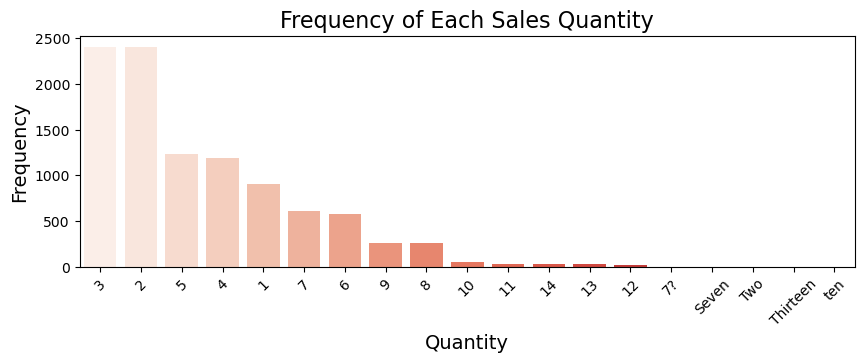

In [39]:
df_Sales_quantity_counts = df_Sales['Quantity'].value_counts()
plt.figure(figsize=(10, 3))
sns.barplot(x=df_Sales_quantity_counts.index, y=df_Sales_quantity_counts.values, palette='Reds')
plt.title('Frequency of Each Sales Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

<span style="color: blue;"> There are several inaccuracies in its values, such as '7?', 'Seven' instead of '7', 'Two' instead of  '2', 'Thirteen' instead of  '13', and 'ten' instead of '10'.</span>

In [40]:
df_Sales['Quantity'] = df_Sales['Quantity'].replace({'7?': '7','Seven': '7','Two': '2', 'Thirteen': '13','ten': '10'})

# Check the unique values again to verify the changes
unique_quantity_corrected = df_Sales['Quantity'].unique()
print("\nCorrected Unique Quantity:", unique_quantity_corrected)


Corrected Unique Quantity: ['6' '5' '4' '3' '13' '7' '8' '9' '2' '10' '12' '11' '14' nan '1']


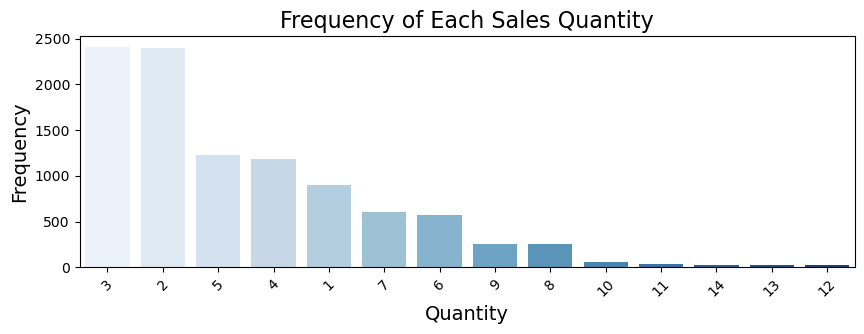

In [41]:
df_Sales_quantity_counts = df_Sales['Quantity'].value_counts()
plt.figure(figsize=(10, 3))
sns.barplot(x=df_Sales_quantity_counts.index, y=df_Sales_quantity_counts.values, palette='Blues')
plt.title('Frequency of Each Sales Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

In [42]:
# Filter rows with NaN in the 'Quantity' column and display relevant columns
rows_with_nan_quantity = df_Sales[df_Sales['Quantity'].isna()][['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(rows_with_nan_quantity)

          Product ID     Sales Quantity  Discount    Profit
28   OFF-BI-10000545  1369.764      NaN      0.70  -913.176
365  OFF-ST-10002574   331.536      NaN      0.20   -82.884
930  FUR-BO-10001337   308.499      NaN      0.15   -18.147
787  TEC-PH-10002890   108.576      NaN      0.40  -25.3344
712  FUR-FU-10001756    38.080      NaN      0.60   -29.512


In [43]:
#Compare with specified 'Product ID' and 'Quantity' in other rows
product_missing_qty = df_Sales.loc[df_Sales['Quantity'].isnull(), 'Product ID'].unique()
print(product_missing_qty)

['OFF-BI-10000545' 'OFF-ST-10002574' 'FUR-BO-10001337' 'TEC-PH-10002890'
 'FUR-FU-10001756']


In [44]:
#Comparing with correspondence Product ID with similar Sales

unique_qty_info = df_Sales[df_Sales['Product ID'].isin(product_missing_qty)][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].drop_duplicates()
print(unique_qty_info)

           Product ID     Sales Quantity  Discount     Profit
9990  OFF-BI-10000545  9892.740       13      0.00    4946.37
18    OFF-BI-10000545  1598.058        7      0.70  -1065.372
27    OFF-BI-10000545  1369.764        6      0.70   -913.176
28    OFF-BI-10000545  1369.764      NaN      0.70   -913.176
9864  OFF-BI-10000545  1217.568        2      0.20    456.588
33    OFF-BI-10000545  1141.470        5      0.70    -760.98
1896  OFF-ST-10002574   828.840        6      0.00          0
17    OFF-BI-10000545   760.980        5      0.80   -1141.47
197   OFF-ST-10002574   663.072        6      0.20   -165.768
622   FUR-BO-10001337   616.998        6      0.15    -36.294
1875  OFF-ST-10002574   552.560        4      0.00          0
232   OFF-ST-10002574   552.560        5      0.20    -138.14
702   FUR-BO-10001337   514.165        5      0.15    -30.245
104   OFF-BI-10000545   456.588        2      0.70   -304.392
7823  FUR-BO-10001337   362.940        3      0.00     36.294
366   OF

####  Imputation with Corresponding Values

To fill in missing 'Quantity' values with correspond values in the dataset

In [45]:
df_Sales.loc[[27, 28, 366,365, 787, 4882,930,712], ['Row ID','Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Row ID,Product ID,Sales,Quantity,Discount,Profit
27,8209,OFF-BI-10000545,1369.764,6,0.70,-913.176
28,8633,OFF-BI-10000545,1369.764,NaN,0.70,-913.176
366,7727,OFF-ST-10002574,331.536,3,0.20,-82.884
365,5725,OFF-ST-10002574,331.536,NaN,0.20,-82.884
787,6417,TEC-PH-10002890,108.576,NaN,0.40,-25.3344
4882,2693,TEC-PH-10002890,108.576,3,0.20,8.1432
930,2797,FUR-BO-10001337,308.499,NaN,0.15,-18.147
712,6370,FUR-FU-10001756,38.080,NaN,0.60,-29.512


In [46]:
#Replace value in 'Quantity'with correspondence 'Product ID' with similar 'Sales'

df_Sales.loc[28, 'Quantity'] = '6'
df_Sales.loc[365, 'Quantity'] = '3'
df_Sales.loc[787, 'Quantity'] = '3'
df_Sales.loc[930, 'Quantity'] = '3'
df_Sales.loc[712, 'Quantity'] = '4'
df_Sales.loc[[27, 28, 366,365, 787, 4882,930,712], ['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Product ID,Sales,Quantity,Discount,Profit
27,OFF-BI-10000545,1369.764,6,0.70,-913.176
28,OFF-BI-10000545,1369.764,6,0.70,-913.176
366,OFF-ST-10002574,331.536,3,0.20,-82.884
365,OFF-ST-10002574,331.536,3,0.20,-82.884
787,TEC-PH-10002890,108.576,3,0.40,-25.3344
4882,TEC-PH-10002890,108.576,3,0.20,8.1432
930,FUR-BO-10001337,308.499,3,0.15,-18.147
712,FUR-FU-10001756,38.080,4,0.60,-29.512


### df_Sales['Discount] outliers and missing values

In [47]:
#Finding Outliers in df_Sales['Discount']

unique_discount = df_Sales['Discount'].unique()
print("\nUnique Discount:", unique_discount)


Unique Discount: [0.5  0.   0.2  0.4  0.7  0.3  0.1  0.15 0.32 0.8  0.45 0.6   nan]


There is no outlier in df_Sales['Discount']. except nan

In [48]:
#Compare with specified 'Product ID' and 'Discount' in other rows
product_missing_discount = df_Sales.loc[df_Sales['Discount'].isnull(), 'Product ID'].unique()
print(product_missing_discount)

['OFF-ST-10000604' 'OFF-BI-10002026' 'OFF-LA-10002762']


In [49]:
#Comparing missing values in 'Discount' with other values in correspondence

unique_discount_info = df_Sales[df_Sales['Product ID'].isin(product_missing_discount)][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].drop_duplicates()

print(unique_discount_info)

           Product ID    Sales Quantity  Discount    Profit
9437  OFF-BI-10002026  437.472       14       0.2  153.1152
6312  OFF-ST-10000604  250.272        9       0.2    15.642
9203  OFF-BI-10002026  234.360        6       0.0  112.4928
8835  OFF-BI-10002026  232.400        5       0.2    78.435
8331  OFF-ST-10000604  208.560        6       NaN     52.14
8573  OFF-BI-10002026  185.920        4       0.2    62.748
8897  OFF-BI-10002026  174.300        3       0.0    81.921
8088  OFF-ST-10000604  173.800        5       0.0     43.45
8807  OFF-LA-10002762  162.890       13       0.0   76.5583
8185  OFF-BI-10002026  139.440        3       0.2    47.061
184   OFF-BI-10002026  104.580        9       0.8  -172.557
375   OFF-BI-10002026  104.580        6       NaN   -80.178
7286  OFF-ST-10000604  104.280        3       0.0     26.07
7602  OFF-BI-10002026   92.960        2       0.2    31.374
8004  OFF-LA-10002762   87.710        7       0.0   41.2237
7781  OFF-LA-10002762   75.180        6 

In [50]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000604 = df_Sales[df_Sales['Product ID'] == 'OFF-ST-10000604'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000604)

           Product ID    Sales Quantity  Discount  Profit
6312  OFF-ST-10000604  250.272        9       0.2  15.642
8331  OFF-ST-10000604  208.560        6       NaN   52.14
8088  OFF-ST-10000604  173.800        5       0.0   43.45
7286  OFF-ST-10000604  104.280        3       0.0   26.07
7285  OFF-ST-10000604  104.280        3       0.0   26.07
6525  OFF-ST-10000604   69.520        2       0.0   17.38
6526  OFF-ST-10000604   69.520        2       0.0   17.38


In [51]:
'''By multiplying each column by 3 in row 6526, I identified that there is a 0.0 Discount in row 8331'''

df_Sales.loc[8331, 'Discount'] = '0.0'

####  Imputation with Corresponding Values

To fill in missing 'Discount' values using discount correspond to the unique 'Product ID' values in the dataset.

In [52]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002026 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10002026'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002026)

           Product ID    Sales Quantity Discount    Profit
9437  OFF-BI-10002026  437.472       14      0.2  153.1152
9203  OFF-BI-10002026  234.360        6      0.0  112.4928
8834  OFF-BI-10002026  232.400        5      0.2    78.435
8835  OFF-BI-10002026  232.400        5      0.2    78.435
8573  OFF-BI-10002026  185.920        4      0.2    62.748
8897  OFF-BI-10002026  174.300        3      0.0    81.921
8185  OFF-BI-10002026  139.440        3      0.2    47.061
184   OFF-BI-10002026  104.580        9      0.8  -172.557
375   OFF-BI-10002026  104.580        6      NaN   -80.178
7602  OFF-BI-10002026   92.960        2      0.2    31.374
6971  OFF-BI-10002026   62.496        2      0.2   21.8736
766   OFF-BI-10002026   34.860        2      0.7   -26.726
1091  OFF-BI-10002026   17.430        1      0.7   -13.363
795   OFF-BI-10002026   15.624        2      0.8  -24.9984


In [53]:
'''By multiplying each column by 6 in row 1091, I identified that there is a 0.7 Discount in row 375'''

df_Sales.loc[375, 'Discount'] = '0.7'

In [54]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002762 = df_Sales[df_Sales['Product ID'] == 'OFF-LA-10002762'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002762)

           Product ID   Sales Quantity Discount   Profit
8807  OFF-LA-10002762  162.89       13      0.0  76.5583
8004  OFF-LA-10002762   87.71        7      0.0  41.2237
8006  OFF-LA-10002762   87.71        7      0.0  41.2237
7780  OFF-LA-10002762   75.18        6      0.0  35.3346
7779  OFF-LA-10002762   75.18        6      NaN  35.3346
7781  OFF-LA-10002762   75.18        6      0.0  35.3346
7128  OFF-LA-10002762   50.12        4      0.0  23.5564
5724  OFF-LA-10002762   25.06        2      0.0  11.7782


In [55]:
#Replace value in 'Discount'with correspondence 'Product ID' with similar 'Sales' and 'Profit'

df_Sales.loc[7779, 'Discount'] = '0.0'

In [56]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002762 = df_Sales[df_Sales['Product ID'] == 'OFF-LA-10002762'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002762)

           Product ID   Sales Quantity Discount   Profit
8807  OFF-LA-10002762  162.89       13      0.0  76.5583
8004  OFF-LA-10002762   87.71        7      0.0  41.2237
8006  OFF-LA-10002762   87.71        7      0.0  41.2237
7780  OFF-LA-10002762   75.18        6      0.0  35.3346
7779  OFF-LA-10002762   75.18        6      0.0  35.3346
7781  OFF-LA-10002762   75.18        6      0.0  35.3346
7128  OFF-LA-10002762   50.12        4      0.0  23.5564
5724  OFF-LA-10002762   25.06        2      0.0  11.7782


### df_Sales['Profit] outliers and missing values

In [57]:
unique_discount = df_Sales['Profit'].unique()
unique_discount_list = unique_discount.tolist()
len(unique_discount_list)

7282

In [58]:
#Compare with specified 'Product ID' and 'Profit' in other rows
product_missing_profit = df_Sales.loc[df_Sales['Profit'].isnull(), 'Product ID'].unique()
print(product_missing_profit)

['FUR-TA-10000198' 'OFF-BI-10001359' 'FUR-BO-10003272' 'FUR-CH-10000309'
 'OFF-ST-10003716' 'FUR-BO-10002545' 'OFF-SU-10003505' 'TEC-PH-10000141'
 'FUR-FU-10000723' 'OFF-AP-10000358' 'OFF-BI-10003291']


In [59]:
#Comparing missing values in 'Profit' with other values in correspondence

unique_profit_info = df_Sales[df_Sales['Product ID'].isin(product_missing_profit)][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].drop_duplicates()

#unique_profit_info.head(60)
len(unique_profit_info)

76

In [60]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000198 = df_Sales[df_Sales['Product ID'] == 'FUR-TA-10000198'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000198)

           Product ID     Sales Quantity Discount      Profit
7     FUR-TA-10000198  4297.644       13      0.4         NaN
21    FUR-TA-10000198  2314.116        7      0.4  -1002.7836
9650  FUR-TA-10000198  1652.940        3      0.0    231.4116
315   FUR-TA-10000198  1322.352        3      0.2    -99.1764
228   FUR-TA-10000198   330.588        1      0.4   -143.2548


In [61]:
# Values in row #7 is 13 times of row #228

df_Sales.loc[7, 'Profit'] = '-1862.3124'

In [62]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000198 = df_Sales[df_Sales['Product ID'] == 'FUR-TA-10000198'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000198)

           Product ID     Sales Quantity Discount      Profit
7     FUR-TA-10000198  4297.644       13      0.4  -1862.3124
21    FUR-TA-10000198  2314.116        7      0.4  -1002.7836
9650  FUR-TA-10000198  1652.940        3      0.0    231.4116
315   FUR-TA-10000198  1322.352        3      0.2    -99.1764
228   FUR-TA-10000198   330.588        1      0.4   -143.2548


In [63]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10001359 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10001359'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10001359)

           Product ID     Sales Quantity Discount      Profit
9971  OFF-BI-10001359  4305.552        6      0.2   1453.1238
9962  OFF-BI-10001359  2690.970        3      0.0   1264.7559
9923  OFF-BI-10001359  2152.776        3      0.2    726.5619
9943  OFF-BI-10001359  1793.980        2      0.0    843.1706
9942  OFF-BI-10001359  1793.980        2      0.0    843.1706
9944  OFF-BI-10001359  1793.980        2      0.0    843.1706
14    OFF-BI-10001359  1614.582        6      0.7         NaN
20    OFF-BI-10001359  1345.485        5      0.7  -1031.5385
11    OFF-BI-10001359   896.990        5      0.8  -1480.0335
9852  OFF-BI-10001359   896.990        1      0.0    421.5853
68    OFF-BI-10001359   538.194        2      0.7   -412.6154


In [64]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10001359 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10001359'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10001359)

           Product ID     Sales Quantity Discount      Profit
9971  OFF-BI-10001359  4305.552        6      0.2   1453.1238
9962  OFF-BI-10001359  2690.970        3      0.0   1264.7559
9923  OFF-BI-10001359  2152.776        3      0.2    726.5619
9943  OFF-BI-10001359  1793.980        2      0.0    843.1706
9942  OFF-BI-10001359  1793.980        2      0.0    843.1706
9944  OFF-BI-10001359  1793.980        2      0.0    843.1706
14    OFF-BI-10001359  1614.582        6      0.7         NaN
20    OFF-BI-10001359  1345.485        5      0.7  -1031.5385
9852  OFF-BI-10001359   896.990        1      0.0    421.5853
11    OFF-BI-10001359   896.990        5      0.8  -1480.0335
68    OFF-BI-10001359   538.194        2      0.7   -412.6154


In [65]:
# Values in row #14 is 6/5 times of row #20

df_Sales.loc[14, 'Profit'] = '-1237.8462'

In [66]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10001359 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10001359'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10001359)

           Product ID     Sales Quantity Discount      Profit
9971  OFF-BI-10001359  4305.552        6      0.2   1453.1238
9962  OFF-BI-10001359  2690.970        3      0.0   1264.7559
9923  OFF-BI-10001359  2152.776        3      0.2    726.5619
9943  OFF-BI-10001359  1793.980        2      0.0    843.1706
9942  OFF-BI-10001359  1793.980        2      0.0    843.1706
9944  OFF-BI-10001359  1793.980        2      0.0    843.1706
14    OFF-BI-10001359  1614.582        6      0.7  -1237.8462
20    OFF-BI-10001359  1345.485        5      0.7  -1031.5385
11    OFF-BI-10001359   896.990        5      0.8  -1480.0335
9852  OFF-BI-10001359   896.990        1      0.0    421.5853
68    OFF-BI-10001359   538.194        2      0.7   -412.6154


In [67]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003272 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10003272'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003272)

          Product ID      Sales Quantity Discount    Profit
62   FUR-BO-10003272  1352.3976        9     0.32       NaN
289  FUR-BO-10003272   883.9200        5      0.2   -110.49
572  FUR-BO-10003272   353.5680        2      0.2   -44.196
571  FUR-BO-10003272   353.5680        2      0.2   -44.196
322  FUR-BO-10003272   300.5328        2     0.32  -97.2312
846  FUR-BO-10003272   176.7840        1      0.2   -22.098


In [68]:
# Values in row #62 is 9/2 times of row #322

df_Sales.loc[62, 'Profit'] = '-437.5404'

In [69]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003272 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10003272'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003272)

          Product ID      Sales Quantity Discount     Profit
62   FUR-BO-10003272  1352.3976        9     0.32  -437.5404
289  FUR-BO-10003272   883.9200        5      0.2    -110.49
572  FUR-BO-10003272   353.5680        2      0.2    -44.196
571  FUR-BO-10003272   353.5680        2      0.2    -44.196
322  FUR-BO-10003272   300.5328        2     0.32   -97.2312
846  FUR-BO-10003272   176.7840        1      0.2    -22.098


In [70]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000309 = df_Sales[df_Sales['Product ID'] == 'FUR-CH-10000309'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000309)

           Product ID     Sales Quantity Discount    Profit
9853  FUR-CH-10000309  1690.040        4      0.0    422.51
8932  FUR-CH-10000309  1352.032        4      0.2    84.502
9768  FUR-CH-10000309  1267.530        3      0.0  316.8825
447   FUR-CH-10000309   887.271        3      0.3       NaN
448   FUR-CH-10000309   887.271        3      0.3  -63.3765


In [71]:
# Values in row #447 and row #448 are identical

df_Sales.loc[447, 'Profit'] = '-63.3765'

In [72]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000309 = df_Sales[df_Sales['Product ID'] == 'FUR-CH-10000309'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000309)

           Product ID     Sales Quantity Discount    Profit
9853  FUR-CH-10000309  1690.040        4      0.0    422.51
8932  FUR-CH-10000309  1352.032        4      0.2    84.502
9768  FUR-CH-10000309  1267.530        3      0.0  316.8825
447   FUR-CH-10000309   887.271        3      0.3  -63.3765
448   FUR-CH-10000309   887.271        3      0.3  -63.3765


In [73]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003716 = df_Sales[df_Sales['Product ID'] == 'OFF-ST-10003716'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003716)

           Product ID     Sales Quantity Discount    Profit
9579  OFF-ST-10003716  1575.140        7      0.0  204.7682
9512  OFF-ST-10003716  1350.120        6      0.0  175.5156
331   OFF-ST-10003716  1080.096        6      0.2  -94.5084
9232  OFF-ST-10003716   900.080        4      0.0  117.0104
9233  OFF-ST-10003716   900.080        4      0.0  117.0104
451   OFF-ST-10003716   720.064        4      0.2  -63.0056
450   OFF-ST-10003716   720.064        4      0.2  -63.0056
8973  OFF-ST-10003716   675.060        3      0.0   87.7578
540   OFF-ST-10003716   540.048        3      0.2  -47.2542
539   OFF-ST-10003716   540.048        3      0.2       NaN
8500  OFF-ST-10003716   450.040        2      0.0   58.5052
991   OFF-ST-10003716   180.016        1      0.2  -15.7514


In [74]:
# Values in row #540 and row #539 are identical

df_Sales.loc[539, 'Profit'] = '-47.2542'

In [75]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003716 = df_Sales[df_Sales['Product ID'] == 'OFF-ST-10003716'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003716)

           Product ID     Sales Quantity Discount    Profit
9579  OFF-ST-10003716  1575.140        7      0.0  204.7682
9512  OFF-ST-10003716  1350.120        6      0.0  175.5156
331   OFF-ST-10003716  1080.096        6      0.2  -94.5084
9232  OFF-ST-10003716   900.080        4      0.0  117.0104
9233  OFF-ST-10003716   900.080        4      0.0  117.0104
451   OFF-ST-10003716   720.064        4      0.2  -63.0056
450   OFF-ST-10003716   720.064        4      0.2  -63.0056
8973  OFF-ST-10003716   675.060        3      0.0   87.7578
540   OFF-ST-10003716   540.048        3      0.2  -47.2542
539   OFF-ST-10003716   540.048        3      0.2  -47.2542
8500  OFF-ST-10003716   450.040        2      0.0   58.5052
991   OFF-ST-10003716   180.016        1      0.2  -15.7514


In [76]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002545 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10002545'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002545)

           Product ID      Sales Quantity Discount     Profit
9844  FUR-BO-10002545  1565.8800        6      0.0   407.1288
9573  FUR-BO-10002545  1552.8310        7     0.15   200.9546
9702  FUR-BO-10002545  1043.9200        4      0.0   271.4192
511   FUR-BO-10002545   913.4300        5      0.3    -52.196
9576  FUR-BO-10002545   782.9400        3      0.0   203.5644
8180  FUR-BO-10002545   626.3520        3      0.2    46.9764
546   FUR-BO-10002545   532.3992        3     0.32        NaN
126   FUR-BO-10002545   521.9600        4      0.5  -250.5408


In [77]:
# Values in row #511 is approximately 5/3 of row #546

df_Sales.loc[546, 'Profit'] = '30.42'

In [78]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002545 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10002545'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002545)

           Product ID      Sales Quantity Discount     Profit
9844  FUR-BO-10002545  1565.8800        6      0.0   407.1288
9573  FUR-BO-10002545  1552.8310        7     0.15   200.9546
9702  FUR-BO-10002545  1043.9200        4      0.0   271.4192
511   FUR-BO-10002545   913.4300        5      0.3    -52.196
9576  FUR-BO-10002545   782.9400        3      0.0   203.5644
8180  FUR-BO-10002545   626.3520        3      0.2    46.9764
546   FUR-BO-10002545   532.3992        3     0.32      30.42
126   FUR-BO-10002545   521.9600        4      0.5  -250.5408


In [79]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003505 = df_Sales[df_Sales['Product ID'] == 'OFF-SU-10003505'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003505)

           Product ID    Sales Quantity Discount   Profit
7749  OFF-SU-10003505  695.160        6      0.0   34.758
7473  OFF-SU-10003505  579.300        5      0.0   28.965
6524  OFF-SU-10003505  347.580        3      0.0   17.379
5681  OFF-SU-10003505  231.720        2      0.0   11.586
5682  OFF-SU-10003505  231.720        2      0.0   11.586
647   OFF-SU-10003505  185.376        2      0.2  -34.758
648   OFF-SU-10003505  185.376        2      0.2  -34.758
649   OFF-SU-10003505  185.376        2      0.2      NaN


In [80]:
# Values in row #648 and row #649 are identical

df_Sales.loc[649, 'Profit'] = '-34.758'

In [81]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003505 = df_Sales[df_Sales['Product ID'] == 'OFF-SU-10003505'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003505)

           Product ID    Sales Quantity Discount   Profit
7749  OFF-SU-10003505  695.160        6      0.0   34.758
7473  OFF-SU-10003505  579.300        5      0.0   28.965
6524  OFF-SU-10003505  347.580        3      0.0   17.379
5681  OFF-SU-10003505  231.720        2      0.0   11.586
5682  OFF-SU-10003505  231.720        2      0.0   11.586
647   OFF-SU-10003505  185.376        2      0.2  -34.758
648   OFF-SU-10003505  185.376        2      0.2  -34.758
649   OFF-SU-10003505  185.376        2      0.2  -34.758


In [82]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000141 = df_Sales[df_Sales['Product ID'] == 'TEC-PH-10000141'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000141)

           Product ID    Sales Quantity Discount    Profit
6342  TEC-PH-10000141  211.168        4      0.2   15.8376
618   TEC-PH-10000141  158.376        4      0.4  -36.9544
753   TEC-PH-10000141  118.782        3      0.4       NaN


In [83]:
# Values in row #753 is 4/3 of row #753

df_Sales.loc[753, 'Profit'] = '-27.716'

In [84]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000141 = df_Sales[df_Sales['Product ID'] == 'TEC-PH-10000141'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000141)

           Product ID    Sales Quantity Discount    Profit
6342  TEC-PH-10000141  211.168        4      0.2   15.8376
618   TEC-PH-10000141  158.376        4      0.4  -36.9544
753   TEC-PH-10000141  118.782        3      0.4   -27.716


In [85]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000723 = df_Sales[df_Sales['Product ID'] == 'FUR-FU-10000723'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000723)

           Product ID    Sales Quantity Discount    Profit
7283  FUR-FU-10000723  289.240        7      0.0   26.0316
6165  FUR-FU-10000723  165.280        4      0.0   14.8752
929   FUR-FU-10000723  132.224        4      0.2  -18.1808
5601  FUR-FU-10000723  123.960        3      0.0   11.1564
5602  FUR-FU-10000723  123.960        3      0.0   11.1564
4701  FUR-FU-10000723   82.640        2      0.0    7.4376
1254  FUR-FU-10000723   66.112        2      0.2   -9.0904
360   FUR-FU-10000723   66.112        4      0.6       NaN
361   FUR-FU-10000723   66.112        4      0.6  -84.2928


In [86]:
# Values in row #360 and row #361 are identical

df_Sales.loc[360, 'Profit'] = '-84.2928'

In [87]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000723 = df_Sales[df_Sales['Product ID'] == 'FUR-FU-10000723'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000723)

           Product ID    Sales Quantity Discount    Profit
7283  FUR-FU-10000723  289.240        7      0.0   26.0316
6165  FUR-FU-10000723  165.280        4      0.0   14.8752
929   FUR-FU-10000723  132.224        4      0.2  -18.1808
5601  FUR-FU-10000723  123.960        3      0.0   11.1564
5602  FUR-FU-10000723  123.960        3      0.0   11.1564
4701  FUR-FU-10000723   82.640        2      0.0    7.4376
360   FUR-FU-10000723   66.112        4      0.6  -84.2928
361   FUR-FU-10000723   66.112        4      0.6  -84.2928
1254  FUR-FU-10000723   66.112        2      0.2   -9.0904


In [88]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000358 = df_Sales[df_Sales['Product ID'] == 'OFF-AP-10000358'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000358)

           Product ID   Sales Quantity Discount   Profit
7295  OFF-AP-10000358  90.860        7      0.0  26.3494
7294  OFF-AP-10000358  90.860        7      0.0  26.3494
7040  OFF-AP-10000358  77.880        6      0.0  22.5852
6671  OFF-AP-10000358  64.900        5      0.0   18.821
3245  OFF-AP-10000358  31.152        3      0.2   3.5046
4726  OFF-AP-10000358  25.960        2      0.0   7.5284
2744  OFF-AP-10000358  20.768        2      0.2   2.3364
501   OFF-AP-10000358  20.768        8      0.8      NaN
3381  OFF-AP-10000358  12.980        1      0.0   3.7642


In [89]:
# No correspondence values to be compared.

df_Sales.loc[501, 'Profit'] = '0'

In [90]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003291 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10003291'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003291)

           Product ID   Sales Quantity Discount    Profit
6067  OFF-BI-10003291  41.904        6      0.2   14.1426
6068  OFF-BI-10003291  41.904        6      0.2   14.1426
5235  OFF-BI-10003291  27.936        4      0.2    9.4284
5234  OFF-BI-10003291  27.936        4      0.2    9.4284
4608  OFF-BI-10003291  20.952        3      0.2    7.0713
4889  OFF-BI-10003291  17.460        2      0.0    8.2062
4888  OFF-BI-10003291  17.460        2      0.0    8.2062
884   OFF-BI-10003291  12.222        7      0.8       NaN
957   OFF-BI-10003291  10.476        6      0.8  -17.2854
1424  OFF-BI-10003291   7.857        3      0.7   -6.0237
2755  OFF-BI-10003291   6.984        1      0.2    2.3571
1557  OFF-BI-10003291   5.238        2      0.7   -4.0158


In [91]:
# Values in row #884 is 7/6 of row #957

df_Sales.loc[884, 'Profit'] = '-20.1663'

In [92]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003291 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10003291'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003291)

           Product ID   Sales Quantity Discount    Profit
6067  OFF-BI-10003291  41.904        6      0.2   14.1426
6068  OFF-BI-10003291  41.904        6      0.2   14.1426
5235  OFF-BI-10003291  27.936        4      0.2    9.4284
5234  OFF-BI-10003291  27.936        4      0.2    9.4284
4608  OFF-BI-10003291  20.952        3      0.2    7.0713
4889  OFF-BI-10003291  17.460        2      0.0    8.2062
4888  OFF-BI-10003291  17.460        2      0.0    8.2062
884   OFF-BI-10003291  12.222        7      0.8  -20.1663
957   OFF-BI-10003291  10.476        6      0.8  -17.2854
1424  OFF-BI-10003291   7.857        3      0.7   -6.0237
2755  OFF-BI-10003291   6.984        1      0.2    2.3571
1557  OFF-BI-10003291   5.238        2      0.7   -4.0158


In [93]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000418 = df_Sales[df_Sales['Product ID'] == 'TEC-MA-10000418'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000418)

           Product ID     Sales Quantity Discount        Profit
9807  TEC-MA-10000418  4799.984        2      0.2      359.9988
0     TEC-MA-10000418  4499.985        5      0.7     -6599.978
5     TEC-MA-10000418  1799.994        2      0.7  "-2639.9912"


In [94]:
# Unify the value with remove the " "

df_Sales.loc[5, 'Profit'] = '-2639.9912'

In [95]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000418 = df_Sales[df_Sales['Product ID'] == 'TEC-MA-10000418'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000418)

           Product ID     Sales Quantity Discount      Profit
9807  TEC-MA-10000418  4799.984        2      0.2    359.9988
0     TEC-MA-10000418  4499.985        5      0.7   -6599.978
5     TEC-MA-10000418  1799.994        2      0.7  -2639.9912


In [96]:
print(df_Sales.dtypes)

Row ID          int64
Order ID       object
Product ID     object
Sales         float64
Quantity       object
Discount       object
Profit         object
dtype: object


#### Change data types of 'Quantity' and 'Profit' become NUMERICAL

#### df_Sales - Change data types 

In [97]:
df_Sales['Quantity'] = pd.to_numeric(df_Sales['Quantity'], errors='coerce').fillna(0).astype(int)
df_Sales['Discount'] = pd.to_numeric(df_Sales['Discount'], errors='coerce')
df_Sales['Profit'] = pd.to_numeric(df_Sales['Profit'], errors='coerce')
print(df_Sales.dtypes)

Row ID          int64
Order ID       object
Product ID     object
Sales         float64
Quantity        int32
Discount      float64
Profit        float64
dtype: object


In [98]:
#Check updated missing value in df_Sales
df_Sales_missing_values = df_Sales.isnull().sum()
print(df_Sales_missing_values)

Row ID        0
Order ID      1
Product ID    2
Sales         0
Quantity      0
Discount      0
Profit        0
dtype: int64


<span style="color: blue;"> Every column in the df_Sales dataset is now complete with no missing values, except for 'Order ID', which will be addressed during the processing of df_Order, and 'Product ID', which will be obtained from df_Product.</span>

## To Merge df_Product and df_Sales into df_Product_Sales

In [99]:
df_Product_Sales = pd.merge(df_Product[['Row ID','Product ID', 'Category', 'Sub-Category', 'Product Name']], 
                df_Sales[['Row ID', 'Order ID', 'Sales', 'Quantity', 'Discount', 'Profit']], on='Row ID', how='inner')

In [100]:
#Check updated missing value in df_Sales
df_Product_Sales_missing_values = df_Product_Sales.isnull().sum()
print(df_Product_Sales_missing_values)

Row ID          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Order ID        1
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


# 3. df_Customer group

In [101]:
df_Customer.head(10)

,Row ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,7773,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,Est
1,684,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,"""27217""",South
2,9775,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207,Central
3,3012,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027,West
4,4992,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653,Central
5,3152,NF-18385,Natalie Fritzler,Consumer,United States,Newark,Ohio,43055,East
6,5311,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central
7,9640,JH-15985,Joseph Holt,Consumer,United States,Concord,North Carolina,28027,South
8,1200,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77041,Central
9,2698,SM-20320,Sean Miller,Home Office,NaN,Jacksonville,Florida,32216,Southh


In [102]:
# Show data types of each column in df_Customer
print(df_Customer.dtypes)

Row ID            int64
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
dtype: object


## df_Customer Handling Outliers

In [103]:
#Finding Outliers in df_Customer['Region']

unique_region = df_Customer['Region'].unique()
print(unique_region)

['Est' 'South' 'Central' 'West' 'East' 'Southh' 'Centrl' nan 'Cntral']


In [104]:
# Replace 'Centrl' and 'Cntral' with 'Central' in the 'Region' column
df_Customer['Region'] = df_Customer['Region'].replace({'Centrl': 'Central', 'Cntral': 'Central', 'Southh': 'South'})

unique_region = df_Customer['Region'].unique()
print(unique_region)

['Est' 'South' 'Central' 'West' 'East' nan]


In [105]:
#Finding Outliers in df_Customer['Customer Name']

unique_custname = df_Customer['Customer Name'].unique()
len(unique_custname)

795

In [106]:
#Finding Outliers in df_Customer['Segment']

unique_segment = df_Customer['Segment'].unique()
print(unique_segment)

['Consumer' 'Corporate' 'Home Office' '%' nan]


In [107]:
df_Customer.sort_values(by=['Segment'], inplace=True, ascending=False)
segment1 = df_Customer[df_Customer['Segment'] == '%'][[
    'Customer ID', 'Customer Name', 'Segment','Country', 'City']]
print(segment1)

   Customer ID Customer Name Segment        Country          City
43    SB-20290  Sean Braxton       %  United States  Philadelphia


<span style="color: blue;"> Will compare the Segment value of the same Customer ID in other orders</span>

In [108]:
df_Customer.sort_values(by=['Customer ID'], inplace=True, ascending=False)
cust_20290 = df_Customer[df_Customer['Customer ID'] == 'SB-20290'][[
    'Customer ID', 'Customer Name', 'Segment','Country', 'City']]
print(cust_20290)

     Customer ID Customer Name    Segment        Country          City
123     SB-20290  Sean Braxton  Corporate  United States       Houston
3596    SB-20290  Sean Braxton  Corporate  United States  Philadelphia
4952    SB-20290  Sean Braxton  Corporate  United States  Philadelphia
3686    SB-20290  Sean Braxton  Corporate  United States     Henderson
43      SB-20290  Sean Braxton          %  United States  Philadelphia
8852    SB-20290  Sean Braxton  Corporate  United States     San Diego
5246    SB-20290  Sean Braxton  Corporate  United States     Henderson
6482    SB-20290  Sean Braxton  Corporate  United States          Kent
49      SB-20290  Sean Braxton  Corporate  United States       Houston
1333    SB-20290  Sean Braxton  Corporate  United States   Springfield
26      SB-20290  Sean Braxton  Corporate  United States   Springfield
1030    SB-20290  Sean Braxton  Corporate  United States  Philadelphia
6957    SB-20290  Sean Braxton  Corporate  United States     Henderson
5851  

In [109]:
df_Customer.loc[43, 'Segment'] = 'Corporate'

In [110]:
#Finding Outliers in df_Customer['Country']

unique_country = df_Customer['Country'].unique()
print(unique_country)

['United States' 'US' nan '56']


In [111]:
df_Customer.sort_values(by=['Country'], inplace=True, ascending=False)
country56 = df_Customer[df_Customer['Country'] == '56'][[
    'Customer ID', 'Customer Name', 'Segment','Country', 'City', 'State']]
print(country56)

   Customer ID   Customer Name   Segment Country       City      State
27    BG-11035  Barry Gonzalez  Consumer      56  Nashville  Tennessee


In [112]:
df_Customer.loc[27, 'Country'] = 'United States'

In [113]:
# Replace 'US' with 'United States' in the 'Country' column
df_Customer['Country'] = df_Customer['Country'].replace({'US': 'United States'})
unique_country = df_Customer['Country'].unique()
print(unique_country)

['United States' nan]


In [114]:
#Finding Outliers in df_Customer['City']

unique_city = df_Customer['City'].unique()
len(unique_city)

532

In [115]:
#Finding Outliers in df_Customer['State']

unique_state = df_Customer['State'].unique()
print(unique_state)

['Florida' 'Delaware' 'Wisconsin' 'Arizona' 'Montana' 'Utah' 'New York'
 'California' 'Michigan' 'New Hampshire' 'Texas' 'Virginia' 'South Dakota'
 'Oregon' 'Georgia' 'New Jersey' 'Maryland' 'Illinois' 'Pennsylvania'
 'North Carolina' 'Rhode Island' 'Ohio' 'Colorado' 'Arkansas' 'Tennessee'
 'Minnesota' 'Massachusetts' 'Washington' 'Oklahoma' 'Alabama'
 'West Virginia' 'Missouri' 'Mississippi' 'Connecticut' 'South Carolina'
 'Kansas' 'Indiana' 'New Mexico' 'Kentucky' 'Iowa' 'Nebraska' 'Louisiana'
 'Idaho' 'Nevada' 'District of Columbia' nan 'North Dakota' 'Vermont'
 'Maine' 'Wyoming']


In [116]:
#Finding Outliers in df_Customer['Postal Code']

unique_postcode = df_Customer['Postal Code'].unique()
len(unique_postcode)

634

### df_Customer Handling Missing Values

In [117]:
df_Customer_missing_values = df_Customer.isnull().sum()
print(df_Customer_missing_values)

Row ID           0
Customer ID      0
Customer Name    3
Segment          3
Country          4
City             2
State            4
Postal Code      3
Region           3
dtype: int64


###  "Imputation with Corresponding Values" for missing values in "Customer Name" column.

To fill in missing 'Customer Name' values using names linked to the unique 'Customer ID' values in the dataset.

In [118]:
#Compare with specified 'Customer ID' and 'Customer Name' in other rows
customer_ids_missing_name = df_Customer.loc[df_Customer['Customer Name'].isnull(), 'Customer ID'].unique()
print(customer_ids_missing_name)

['DH-13075' 'BP-11095' 'SO-20335']


In [119]:
unique_customer_info = df_Customer[df_Customer['Customer ID'].isin(customer_ids_missing_name)][[
    'Customer ID','Customer Name']].drop_duplicates()
print(unique_customer_info)

     Customer ID   Customer Name
869     DH-13075             NaN
9184    BP-11095    Bart Pistole
877     BP-11095             NaN
6281    DH-13075   Dave Hallsten
5648    SO-20335  Sean O'Donnell
76      SO-20335             NaN


In [120]:
# Replace NaN values in 'Customer Name' with "Customer Name" values in corresponding Customer ID"

for index, row in unique_customer_info.iterrows():
    customer_id = row['Customer ID']
    customer_name = df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Customer Name'].dropna().iloc[0]
    df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Customer Name'] = customer_name
    
specific_customer_name_info = df_Customer[df_Customer['Customer ID'].isin(['SO-20335', 'DH-13075', 'BP-11095'])][[
    'Customer ID', 'Customer Name']].drop_duplicates()
print(specific_customer_name_info)

     Customer ID   Customer Name
869     DH-13075   Dave Hallsten
9184    BP-11095    Bart Pistole
5648    SO-20335  Sean O'Donnell


### To fill in missing 'Segment' values linked to the unique 'Customer ID' values in the dataset.

In [121]:
#Compare with specified 'Customer ID' and 'Segment' in other rows
customer_ids_missing_segment = df_Customer.loc[df_Customer['Segment'].isnull(), 'Customer ID'].unique()
print(customer_ids_missing_segment)

['EP-13915' 'TC-21475' 'TG-21310']


In [122]:
unique_segment_info = df_Customer[df_Customer['Customer ID'].isin(customer_ids_missing_segment)][[
    'Customer ID','Segment']].drop_duplicates()
print(unique_segment_info)

     Customer ID      Segment
7501    EP-13915     Consumer
206     EP-13915          NaN
9862    TG-21310     Consumer
414     TC-21475  Home Office
494     TC-21475          NaN
443     TG-21310          NaN


In [123]:
# Replace NaN values in 'Segment' with "Segment" values in corresponding Customer ID" 

for index, row in unique_segment_info.iterrows():
    customer_id = row['Customer ID']
    segment = df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Segment'].dropna().iloc[0]
    df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Segment'] = segment
    
specific_segment_info = df_Customer[df_Customer['Customer ID'].isin(['EP-13915', 'TG-21310', 'TC-21475'])][[
    'Customer ID', 'Segment']]

specific_segment_info = df_Customer.loc[[142, 163, 206, 414, 443, 494], ['Customer ID', 'Segment']]
print(specific_segment_info)

    Customer ID      Segment
142    EP-13915     Consumer
163    TG-21310     Consumer
206    EP-13915     Consumer
414    TC-21475  Home Office
443    TG-21310     Consumer
494    TC-21475  Home Office


### Imputation with Corresponding Values in 'Customer ID' for other missing values in Customer Group 

In [124]:
Customer_columns_to_update = ['Country', 'City', 'State', 'Postal Code', 'Region']

for column in Customer_columns_to_update:
    customer_ids_missing_values = df_Customer.loc[df_Customer[column].isnull(), 'Customer ID'].unique()      
    for customer_id in customer_ids_missing_values:
        
        # Check if there's at least one not-null value for this Customer ID in the current column
        if not df_Customer[df_Customer['Customer ID'] == customer_id][column].dropna().empty:
            
            # Get the first not-null value 
            value_to_fill = df_Customer.loc[df_Customer['Customer ID'] == customer_id, column].dropna().iloc[0]
            
            # Fill in missing values for Customer ID in the current column
            df_Customer.loc[df_Customer['Customer ID'] == customer_id, column] = value_to_fill

In [125]:
#Check updated missing value in df_Customer
df_Customer_missing_values = df_Customer.isnull().sum()
print(df_Customer_missing_values)

Row ID           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
dtype: int64


# 4. df_Order group

In [126]:
df_Order.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID
0,7773,CA-2016-108196,25/11/2016,12/02/2016,Standard Class,CS-12505
1,684,US-2017-168116,11/04/2017,11/04/2017,Same Day,GT-14635
2,9775,CA-2014-169019,26/07/2014,30/07/2014,Standard Class,LF-17185
3,3012,CA-2017-134845,17/04/2017,24/04/2017,Standard Class,SR-20425
4,4992,US-2017-122714,12/07/2017,13/12/2017,Standard Class,HG-14965
5,3152,CA-2015-147830,15/12/2015,18/12/2015,First Class,NF-18385
6,5311,CA-2017-131254,19/11/2017,21/11/2017,First Class,NC-18415
7,9640,CA-2015-116638,28/01/2015,NaN,Second Class,JH-15985
8,1200,CA-2016-130946,04/08/2016,04/12/2016,Standard Class,ZC-21910
9,2698,CA-2014-145317,18/03/2014,23/03/2014,Standard Class,SM-20320


In [127]:
# Show data types of each column in df_Order
print(df_Order.dtypes)

Row ID          int64
Order ID       object
Order Date     object
Ship Date      object
Ship Mode      object
Customer ID    object
dtype: object


## df_Order group Handling Outliers

In [128]:
#Finding Outliers in df_Order['Ship Mode']

unique_shipmode = df_Order['Ship Mode'].unique()
print(unique_shipmode)

['Standard Class' 'Same Day' 'First Class' 'Second Class' nan]


## df_Order handling missing value

In [129]:
#Check updated missing value in df_Order
df_Order_missing_values = df_Order.isnull().sum()
print(df_Order_missing_values)

Row ID         0
Order ID       1
Order Date     2
Ship Date      3
Ship Mode      4
Customer ID    0
dtype: int64


In [130]:
# Show all rows where any  specified columns have missing values
missing_values_filter = df_Order['Order ID'].isnull() | \
                        df_Order['Order Date'].isnull() | \
                        df_Order['Ship Date'].isnull() | \
                        df_Order['Ship Mode'].isnull()

# get rows with missing values in the columns
df_Order_with_missing_values = df_Order[missing_values_filter]
print(df_Order_with_missing_values[['Order ID','Order Date','Ship Date','Ship Mode']])

            Order ID  Order Date   Ship Date       Ship Mode
7     CA-2015-116638  28/01/2015         NaN    Second Class
13    US-2017-120390  19/10/2017         NaN  Standard Class
150   CA-2014-106229  06/07/2014  06/11/2014             NaN
197   US-2015-130512         NaN  25/08/2015  Standard Class
202              NaN  27/11/2015  12/03/2015  Standard Class
211   US-2016-141264  13/08/2016         NaN  Standard Class
244   CA-2014-155887         NaN  17/05/2014             NaN
870   CA-2016-159009  23/09/2016  27/09/2016             NaN
1030  CA-2014-122882  09/07/2014  13/09/2014             NaN


### df_Order['Ship Mode] - Handling missing values

<span style="color: blue;">To find the most frequently used Ship Mode by the customer with ID KT-16480</span>

In [131]:
#Show all columns in df_Order for each unique Ship Mode, drop duplicates
columns2_to_check = ['Ship Mode']

for column in columns2_to_check:
    unique_values = df_Order[column].unique().tolist()
    print(f"\nUnique {column}:", unique_values)


Unique Ship Mode: ['Standard Class', 'Same Day', 'First Class', 'Second Class', nan]


In [132]:
df_Order.loc[244, 'Ship Mode'] = 'Second Class'

In [133]:
df_Order.loc[150, 'Ship Mode'] = 'Second Class'
df_Order.loc[870, 'Ship Mode'] = 'Second Class'
df_Order.loc[1030, 'Ship Mode'] = 'Standard Class'

### df_Order['Ship Date] - Handling missing values

In [134]:
df_Order.loc[7, 'Ship Date'] = '01/02/2015'
df_Order.loc[13, 'Ship Date'] = '25/10/2017'
df_Order.loc[211, 'Ship Date'] = '19/08/2016'

### df_Order['Order ID] - Handling missing values

<span style="color: blue;"> Seems values in 'Order ID' is related to Country and year of order date</span>

In [135]:
df.loc[202, 'Country']

'United States'

In [136]:
#filtered_rows = df_Order[df_Order['Order Date'].str.contains('27/11/2015', na=False)]
filtered_rows = df[df['Order Date'].str.contains('27/11/2015', na=False)]
print(filtered_rows[['Order ID','Order Date','Ship Date', 'Ship Mode', 'Customer ID']])

            Order ID  Order Date   Ship Date       Ship Mode Customer ID
202              NaN  27/11/2015  12/03/2015  Standard Class    EH-14125
209   US-2015-168935  27/11/2015  12/02/2015  Standard Class    DO-13435
1831  US-2015-168935  27/11/2015  12/02/2015  Standard Class    DO-13435
1931  CA-2015-130974  27/11/2015  29/11/2015    Second Class    MA-17560
3038  CA-2015-160059  27/11/2015  12/01/2015  Standard Class    TB-21190
3734  CA-2015-130974  27/11/2015  29/11/2015    Second Class    MA-17560
4686  CA-2015-145184  27/11/2015  29/11/2015     First Class    JD-16150
5846  CA-2015-163762  27/11/2015  12/01/2015  Standard Class    JE-15475
6557  CA-2015-101910  27/11/2015  12/03/2015  Standard Class    CD-11920
6711  CA-2015-130974  27/11/2015  29/11/2015    Second Class    MA-17560
7047  CA-2015-125234  27/11/2015  12/01/2015  Standard Class    SN-20710
7124  CA-2015-145184  27/11/2015  29/11/2015     First Class    JD-16150
7418  CA-2015-130974  27/11/2015  29/11/2015    Sec

In [137]:
#Check if 'US-2015-168934' Order ID is exist

filtered_rows2 = df[df['Order ID'].str.contains('US-2015-168934', na=False)]
print(filtered_rows2[['Order ID','Order Date', 'Ship Mode', 'Customer ID']])

Empty DataFrame
Columns: [Order ID, Order Date, Ship Mode, Customer ID]
Index: []


In [138]:
#Since 'US-2015-168934' Order ID doesn't exist, we can fill in the missing value in Order ID with this value

df_Order.loc[202, 'Order ID'] = 'US-2015-168934'

### df_Order['Order Date] - Handling outliers and missing values

In [139]:
df_Order.sort_values(by=['Ship Mode'], inplace=True, ascending=False)
order_130512 = df_Order[df_Order['Order ID'] == 'US-2015-130512'][['Order ID', 'Order Date', 'Ship Date','Ship Mode']]
print(order_130512)

            Order ID  Order Date   Ship Date       Ship Mode
6254  US-2015-130512  21/08/2015  25/08/2015  Standard Class
1856  US-2015-130512  21/08/2015  25/08/2015  Standard Class
364   US-2015-130512  21/08/2015  25/08/2015  Standard Class
197   US-2015-130512         NaN  25/08/2015  Standard Class
3399  US-2015-130512  21/08/2015  25/08/2015  Standard Class


In [140]:
df_Order.sort_values(by=['Ship Mode'], inplace=True, ascending=False)
order_155887 = df_Order[df_Order['Order ID'] == 'CA-2014-155887'][['Order ID', 'Order Date', 'Ship Date','Ship Mode', 'Customer ID']]
print(order_155887)

           Order ID Order Date   Ship Date     Ship Mode Customer ID
244  CA-2014-155887        NaN  17/05/2014  Second Class    KT-16480


<span style="color: blue;"> will look into the shipping mode preferences of this particular customer.</span>

In [141]:
df_Order.sort_values(by=['Order ID'], inplace=True, ascending=False)
order_KT16480 = df_Order[df_Order['Customer ID'] == 'KT-16480'][['Order ID', 'Order Date', 'Ship Date','Ship Mode', 'Customer ID']]
print(order_KT16480)

            Order ID  Order Date   Ship Date       Ship Mode Customer ID
5225  US-2014-140116  03/10/2014  17/03/2014  Standard Class    KT-16480
989   US-2014-140116  03/10/2014  17/03/2014  Standard Class    KT-16480
2331  CA-2017-159107  24/06/2017  26/06/2017    Second Class    KT-16480
1426  CA-2017-142461  30/05/2017  06/03/2017    Second Class    KT-16480
2784  CA-2017-126718  29/04/2017  05/04/2017  Standard Class    KT-16480
7171  CA-2017-123351  21/09/2017  25/09/2017  Standard Class    KT-16480
5834  CA-2017-105326  20/08/2017  27/08/2017  Standard Class    KT-16480
652   CA-2016-146206  09/10/2016  14/09/2016    Second Class    KT-16480
8390  CA-2016-146206  09/10/2016  14/09/2016    Second Class    KT-16480
2108  CA-2015-132570  31/10/2015  11/02/2015    Second Class    KT-16480
7805  CA-2015-132570  31/10/2015  11/02/2015    Second Class    KT-16480
244   CA-2014-155887         NaN  17/05/2014    Second Class    KT-16480
9661  CA-2014-116666  05/08/2014  05/10/2014     Fi

In [142]:
order_KT16480['Ship Mode'].value_counts().idxmax()

'Second Class'

In [143]:
df_Order.loc[197, 'Order Date'] = '18/08/2015'
df_Order.loc[244, 'Order Date'] = '13/05/2014'

In [144]:
#Check updated missing value in df_Order
df_Order_missing_values = df_Order.isnull().sum()
print(df_Order_missing_values)

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
dtype: int64


### Convert df_Order[['Order Date','Ship Date']]'to datetime dtype

In [145]:
df_Order['Order Date'] = pd.to_datetime(df_Order['Order Date'], format='%d/%m/%Y', errors='coerce')
df_Order['Ship Date'] = pd.to_datetime(df_Order['Ship Date'], format='%d/%m/%Y', errors='coerce')
df_Order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID
562,5930,US-2017-169551,2017-07-07,2017-09-07,First Class,RL-19615
282,5932,US-2017-169551,2017-07-07,2017-09-07,First Class,RL-19615
4013,5931,US-2017-169551,2017-07-07,2017-09-07,First Class,RL-19615
3783,5934,US-2017-169551,2017-07-07,2017-09-07,First Class,RL-19615
8949,5935,US-2017-169551,2017-07-07,2017-09-07,First Class,RL-19615


In [146]:
print(df_Order.dtypes)

Row ID                  int64
Order ID               object
Order Date     datetime64[ns]
Ship Date      datetime64[ns]
Ship Mode              object
Customer ID            object
dtype: object


### To filter the data where the day and month might have mistakenly swapped or incorrectly entered:

In [147]:
order_month = df_Order['Order Date'].dt.month
filtered_order_mm = df_Order[order_month > 12]
print(filtered_order_mm)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID]
Index: []


In [148]:
ship_month = df_Order['Ship Date'].dt.month
filtered_ship_mm = df_Order[order_month > 12]
print(filtered_ship_mm)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID]
Index: []


<span style="color: blue;"> It appears there are no months exceeding 12.</span>

### To find the mode of the 'Delivery Duration' between 'Ship Date' and 'Order Date' for each 'Ship Mode'

In [149]:
# Calculate the difference between 'Ship Date' and 'Order Date'
df_Order['Delivery Duration'] = (df_Order['Ship Date'] - df_Order['Order Date']).dt.days

# Filter the DataFrame for shipments
Same_Day_orders = df_Order[df_Order['Ship Mode'] == 'Same Day']
First_Class_orders = df_Order[df_Order['Ship Mode'] == 'First Class']
Second_Class_orders = df_Order[df_Order['Ship Mode'] == 'Second Class']
Standard_Class_orders = df_Order[df_Order['Ship Mode'] == 'Standard Class']

# Calculate max, mode, and min of
Same_Day_max_duration = Same_Day_orders['Delivery Duration'].max()
Same_Day_mode_duration = Same_Day_orders['Delivery Duration'].mode()[0]  
Same_Day_mean_duration = Same_Day_orders['Delivery Duration'].mean()
Same_Day_min_duration = Same_Day_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for Same Day : {Same_Day_max_duration} days")
print(f"Mode of delivery duration for Same Day : {Same_Day_mode_duration} days")
print(f"Mean of delivery duration for Same Day: {round(Same_Day_mean_duration, 1)} days")
print(f"Minimum delivery duration for Same Day : {Same_Day_min_duration} days")
print('-----------------------------------------------------')
# Calculate max, mode, and min of
First_Class_max_duration = First_Class_orders['Delivery Duration'].max()
First_Class_mode_duration = First_Class_orders['Delivery Duration'].mode()[0] 
First_Class_mean_duration = First_Class_orders['Delivery Duration'].mean()
First_Class_min_duration = First_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for First Class : {First_Class_max_duration} days")
print(f"Mode of delivery duration for First Class : {First_Class_mode_duration} days")
print(f"Mean of delivery duration for First Class : {round(First_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for First Class : {First_Class_min_duration} days")
print('-----------------------------------------------------')
Second_Class_max_duration = Second_Class_orders['Delivery Duration'].max()
Second_Class_mode_duration = Second_Class_orders['Delivery Duration'].mode()[0]  
Second_Class_mean_duration = Second_Class_orders['Delivery Duration'].mean()
Second_Class_min_duration = Second_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for second Class : {Second_Class_max_duration} days")
print(f"Mode of delivery duration for second Class : {Second_Class_mode_duration} days")
print(f"Mean of delivery duration for second Class : {round(Second_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for second Class : {Second_Class_min_duration} days")
print('-----------------------------------------------------')
Standard_Class_max_duration = Standard_Class_orders['Delivery Duration'].max()
Standard_Class_mode_duration = Standard_Class_orders['Delivery Duration'].mode()[0]  
Standard_Class_mean_duration = Standard_Class_orders['Delivery Duration'].mean()
Standard_Class_min_duration = Standard_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for second Class : {Standard_Class_max_duration} days")
print(f"Mode of delivery duration for second Class : {Standard_Class_mode_duration} days")
print(f"Mean of delivery duration for second Class : {round(Standard_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for second Class : {Standard_Class_min_duration} days")
print('-----------------------------------------------------')

Maximum delivery duration for Same Day : 31.0 days
Mode of delivery duration for Same Day : 0.0 days
Mean of delivery duration for Same Day: 0.6 days
Minimum delivery duration for Same Day : -87.0 days
-----------------------------------------------------
Maximum delivery duration for First Class : 92.0 days
Mode of delivery duration for First Class : 3.0 days
Mean of delivery duration for First Class : 6.7 days
Minimum delivery duration for First Class : -320.0 days
-----------------------------------------------------
Maximum delivery duration for second Class : 153.0 days
Mode of delivery duration for second Class : 2.0 days
Mean of delivery duration for second Class : 5.2 days
Minimum delivery duration for second Class : -322.0 days
-----------------------------------------------------
Maximum delivery duration for second Class : 214.0 days
Mode of delivery duration for second Class : 4.0 days
Mean of delivery duration for second Class : 12.2 days
Minimum delivery duration for seco

### The dataset appears to be inconsistent, potentially due to a mix-up between the day (DD) and month (MM) fields.

In [150]:
# Calculate the difference between 'Ship Date' and 'Order Date'
df_Order['Delivery Duration'] = (df_Order['Ship Date'] - df_Order['Order Date']).dt.days

# Filter the DataFrame for shipments
Same_Day_orders = df_Order[df_Order['Ship Mode'] == 'Same Day']
First_Class_orders = df_Order[df_Order['Ship Mode'] == 'First Class']
Second_Class_orders = df_Order[df_Order['Ship Mode'] == 'Second Class']
Standard_Class_orders = df_Order[df_Order['Ship Mode'] == 'Standard Class']

# Calculate max, mode, and min of
Same_Day_max_duration = Same_Day_orders['Delivery Duration'].max()
Same_Day_mode_duration = Same_Day_orders['Delivery Duration'].mode()[0]  
Same_Day_mean_duration = Same_Day_orders['Delivery Duration'].mean()
Same_Day_min_duration = Same_Day_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for Same Day : {Same_Day_max_duration} days")
print(f"Mode of delivery duration for Same Day : {Same_Day_mode_duration} days")
print(f"Mean of delivery duration for Same Day: {round(Same_Day_mean_duration, 1)} days")
print(f"Minimum delivery duration for Same Day : {Same_Day_min_duration} days")
print('-----------------------------------------------------')
# Calculate max, mode, and min of
First_Class_max_duration = First_Class_orders['Delivery Duration'].max()
First_Class_mode_duration = First_Class_orders['Delivery Duration'].mode()[0] 
First_Class_mean_duration = First_Class_orders['Delivery Duration'].mean()
First_Class_min_duration = First_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for First Class : {First_Class_max_duration} days")
print(f"Mode of delivery duration for First Class : {First_Class_mode_duration} days")
print(f"Mean of delivery duration for First Class : {round(First_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for First Class : {First_Class_min_duration} days")
print('-----------------------------------------------------')
Second_Class_max_duration = Second_Class_orders['Delivery Duration'].max()
Second_Class_mode_duration = Second_Class_orders['Delivery Duration'].mode()[0]  
Second_Class_mean_duration = Second_Class_orders['Delivery Duration'].mean()
Second_Class_min_duration = Second_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for second Class : {Second_Class_max_duration} days")
print(f"Mode of delivery duration for second Class : {Second_Class_mode_duration} days")
print(f"Mean of delivery duration for second Class : {round(Second_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for second Class : {Second_Class_min_duration} days")
print('-----------------------------------------------------')
Standard_Class_max_duration = Standard_Class_orders['Delivery Duration'].max()
Standard_Class_mode_duration = Standard_Class_orders['Delivery Duration'].mode()[0]  
Standard_Class_mean_duration = Standard_Class_orders['Delivery Duration'].mean()
Standard_Class_min_duration = Standard_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for standard Class : {Standard_Class_max_duration} days")
print(f"Mode of delivery duration for standard Class : {Standard_Class_mode_duration} days")
print(f"Mean of delivery duration for standard Class : {round(Standard_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for standard Class : {Standard_Class_min_duration} days")
print('-----------------------------------------------------')

Maximum delivery duration for Same Day : 31.0 days
Mode of delivery duration for Same Day : 0.0 days
Mean of delivery duration for Same Day: 0.6 days
Minimum delivery duration for Same Day : -87.0 days
-----------------------------------------------------
Maximum delivery duration for First Class : 92.0 days
Mode of delivery duration for First Class : 3.0 days
Mean of delivery duration for First Class : 6.7 days
Minimum delivery duration for First Class : -320.0 days
-----------------------------------------------------
Maximum delivery duration for second Class : 153.0 days
Mode of delivery duration for second Class : 2.0 days
Mean of delivery duration for second Class : 5.2 days
Minimum delivery duration for second Class : -322.0 days
-----------------------------------------------------
Maximum delivery duration for standard Class : 214.0 days
Mode of delivery duration for standard Class : 4.0 days
Mean of delivery duration for standard Class : 12.2 days
Minimum delivery duration fo

###  df_Order['Ship Mode'] == 'Same Day' 
Identify df_Order where 'Delivery Duration' is greater than 2 days or less than 0 for 'Same Day' shipments

In [151]:
# Identifying rows where 'Delivery Duration' is greater than 2 days or less than 0 for 'Same Day' shipments
criteria_sd = (df_Order['Ship Mode'] == 'Same Day') & ((df_Order['Delivery Duration'] > 2) | (
    df_Order['Delivery Duration'] < 0))

# Using the criteria to filter df_Order and then selecting specific columns
filtered_rows = df_Order.loc[criteria_sd, ['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']]

# Printing the filtered rows with specified columns
print(filtered_rows)

      Row ID Order Date  Ship Date Ship Mode  Delivery Duration
1558    1474 2015-01-12 2015-02-12  Same Day               31.0
5143    4769 2017-02-06 2017-03-06  Same Day               28.0
4295    3042 2017-11-09 2017-12-09  Same Day               30.0
5537    3043 2017-11-09 2017-12-09  Same Day               30.0
9687    3044 2017-11-09 2017-12-09  Same Day               30.0
5236    4124 2017-11-05 2017-12-05  Same Day               30.0
6551    4123 2017-11-05 2017-12-05  Same Day               30.0
6478    4122 2017-11-05 2017-12-05  Same Day               30.0
7037    2350 2017-02-12 2017-03-12  Same Day               28.0
7008    2352 2017-02-12 2017-03-12  Same Day               28.0
3851    2353 2017-02-12 2017-03-12  Same Day               28.0
3949    2351 2017-02-12 2017-03-12  Same Day               28.0
3084    2349 2017-02-12 2017-03-12  Same Day               28.0
5142    8770 2016-12-09 2016-09-13  Same Day              -87.0
3905    8771 2016-12-09 2016-09-13  Same

In [152]:
df_Order.loc[5142, 'Order Date'] = '2016-09-12'
df_Order.loc[3905, 'Order Date'] = '2016-09-12'

In [153]:
df_Order.loc[[5142, 3905]]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Delivery Duration
5142,8770,CA-2016-151148,2016-09-12,2016-09-13,Same Day,PO-19180,-87.0
3905,8771,CA-2016-151148,2016-09-12,2016-09-13,Same Day,PO-19180,-87.0


In [154]:
# Identifying rows where 'Delivery Duration' is greater than 2 days or less than 0 for 'Same Day' shipments
criteria_sd = (df_Order['Ship Mode'] == 'Same Day') & (df_Order['Delivery Duration'] > 2)

# Correct the application of the lambda function to swap day and month for rows matching the criteria
df_Order.loc[criteria_sd, 'Order Date'] = pd.to_datetime(df_Order.loc[criteria_sd, 'Order Date'].apply(
    lambda x: x.strftime('%Y-%m-%d') if pd.isnull(x) else x.strftime('%Y-%d-%m')))

df_Order.loc[criteria_sd, 'Ship Date'] = pd.to_datetime(df_Order.loc[criteria_sd, 'Ship Date'].apply(
    lambda x: x.strftime('%Y-%m-%d') if pd.isnull(x) else x.strftime('%Y-%d-%m')))

# Recalculate 'Delivery Duration' after correcting the dates
df_Order['Delivery Duration'] = (df_Order['Ship Date'] - df_Order['Order Date']).dt.days

# Filter & display the corrected rows 
same_day_orders_over_2_days_corrected = df_Order[criteria_sd]
print(same_day_orders_over_2_days_corrected[['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']])

      Row ID Order Date  Ship Date Ship Mode  Delivery Duration
1558    1474 2015-12-01 2015-12-02  Same Day                1.0
5143    4769 2017-06-02 2017-06-03  Same Day                1.0
4295    3042 2017-09-11 2017-09-12  Same Day                1.0
5537    3043 2017-09-11 2017-09-12  Same Day                1.0
9687    3044 2017-09-11 2017-09-12  Same Day                1.0
5236    4124 2017-05-11 2017-05-12  Same Day                1.0
6551    4123 2017-05-11 2017-05-12  Same Day                1.0
6478    4122 2017-05-11 2017-05-12  Same Day                1.0
7037    2350 2017-12-02 2017-12-03  Same Day                1.0
7008    2352 2017-12-02 2017-12-03  Same Day                1.0
3851    2353 2017-12-02 2017-12-03  Same Day                1.0
3949    2351 2017-12-02 2017-12-03  Same Day                1.0
3084    2349 2017-12-02 2017-12-03  Same Day                1.0
635     4823 2016-07-10 2016-07-11  Same Day                1.0
4394    9005 2015-04-05 2015-04-06  Same

<span style="color: blue;"> <span style="color: blue;"> After swapping the day (DD) with the month (MM) in 'Order Date' and 'Ship Date' for entries in df_Order where the 'Delivery Duration' is more than 2 days or less than 0 days for the 'Same Day' ship mode, the delivery times for each ship mode now appear accurate.</span></span>

###  Identify df_Order where 'Delivery Duration' is less than 0 for 'First Class' shipments

In [155]:
criteria_1st = (df_Order['Ship Mode'] == 'First Class') & ((df_Order['Delivery Duration'] < 0) | (
    df_Order['Delivery Duration'] > 4))

filtered_rows_1st = df_Order.loc[criteria_1st, ['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']]
filtered_rows_1st.head(10)

,Row ID,Order Date,Ship Date,Ship Mode,Delivery Duration
562,5930,2017-07-07,2017-09-07,First Class,62.0
282,5932,2017-07-07,2017-09-07,First Class,62.0
4013,5931,2017-07-07,2017-09-07,First Class,62.0
3783,5934,2017-07-07,2017-09-07,First Class,62.0
8949,5935,2017-07-07,2017-09-07,First Class,62.0
2208,5933,2017-07-07,2017-09-07,First Class,62.0
6670,9540,2017-07-09,2017-09-09,First Class,62.0
4786,9539,2017-07-09,2017-09-09,First Class,62.0
1003,9289,2017-11-30,2017-03-12,First Class,-263.0
7494,132,2017-02-02,2017-05-02,First Class,89.0


###  df_Order['Ship Mode'] == 'First Class' 
Identify df_Order where 'Delivery Duration' is greater than 4 days or less than 0 for 'First Class' shipments

In [156]:
def swap_day_month_if_valid(date):
    if pd.isnull(date):
        return date  # Return the original date if it's NaT
    # Ensure the swap only happens if the day is within the 1-12 range, making it a valid month
    if 1 <= date.day <= 12:
        try:
            # Attempt to create a new date with the swapped values
            new_date = pd.Timestamp(year=date.year, month=date.day, day=date.month)
            return new_date
        except ValueError:
            # If the swap results in an invalid date, return the original date
            return date
    else:
        # If the day is not a valid month, return the original date without swapping
        return date

# Apply the function to swap day and month in 'Order Date' and 'Ship Date' for rows matching the criteria
df_Order.loc[criteria_1st, 'Order Date'] = df_Order.loc[criteria_1st, 'Order Date'].apply(swap_day_month_if_valid)
df_Order.loc[criteria_1st, 'Ship Date'] = df_Order.loc[criteria_1st, 'Ship Date'].apply(swap_day_month_if_valid)


# Recalculate 'Delivery Duration' after potentially correcting the 'Ship Date'
df_Order['Delivery Duration'] = (df_Order['Ship Date'] - df_Order['Order Date']).dt.days

first_class_corrected = df_Order[criteria_1st]
print(first_class_corrected[['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']])

      Row ID Order Date  Ship Date    Ship Mode  Delivery Duration
562     5930 2017-07-07 2017-07-09  First Class                2.0
282     5932 2017-07-07 2017-07-09  First Class                2.0
4013    5931 2017-07-07 2017-07-09  First Class                2.0
3783    5934 2017-07-07 2017-07-09  First Class                2.0
8949    5935 2017-07-07 2017-07-09  First Class                2.0
...      ...        ...        ...          ...                ...
1370    5438 2014-07-05 2014-07-08  First Class                3.0
6363    5439 2014-07-05 2014-07-08  First Class                3.0
3958    5437 2014-07-05 2014-07-08  First Class                3.0
7537     428 2014-09-12 2014-09-13  First Class                1.0
1398    6252 2014-12-02 2014-12-04  First Class                2.0

[712 rows x 5 columns]


In [157]:
#Re-check after corrected
criteria_1st = (df_Order['Ship Mode'] == 'First Class') & ((df_Order['Delivery Duration'] < 0) | (
    df_Order['Delivery Duration'] > 4))

filtered_rows_1st = df_Order.loc[criteria_1st, ['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']]
len(filtered_rows_1st)

0

<span style="color: blue;">After swapping the day (DD) with the month (MM) in 'Order Date' and 'Ship Date' for entries in df_Order where the 'Delivery Duration' is more than 4 days or less than 0 days for the 'First Class' ship mode, the delivery times for each ship mode now appear accurate.</span>

### df_Order['Ship Mode'] == 'Second Class' and 'Standard Class'
Identify df_Order where 'Delivery Duration' is greater than 5 days or less than 0 for 'Second Class' shipments

In [158]:
criteria_2nd = (df_Order['Ship Mode'] == 'Second Class') & ((df_Order['Delivery Duration'] < 0) | (
    df_Order['Delivery Duration'] > 5))
criteria_std = (df_Order['Ship Mode'] == 'Standard Class') & ((df_Order['Delivery Duration'] < 0) | (
    df_Order['Delivery Duration'] > 7))

filtered_rows_2nd = df_Order.loc[criteria_2nd, ['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']]
filtered_rows_std = df_Order.loc[criteria_std, ['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']]
filtered_rows_2nd.head()

,Row ID,Order Date,Ship Date,Ship Mode,Delivery Duration
8564,7516,2017-09-12,2017-12-12,Second Class,91.0
5998,7515,2017-09-12,2017-12-12,Second Class,91.0
8214,7518,2017-09-12,2017-12-12,Second Class,91.0
2868,7520,2017-09-12,2017-12-12,Second Class,91.0
2074,7519,2017-09-12,2017-12-12,Second Class,91.0


In [159]:
filtered_rows_std.head()

,Row ID,Order Date,Ship Date,Ship Mode,Delivery Duration
4174,4598,2017-08-28,2017-01-09,Standard Class,-231.0
7309,4599,2017-08-28,2017-01-09,Standard Class,-231.0
4197,8294,2017-03-11,2017-07-11,Standard Class,122.0
1755,2121,2017-07-01,2017-01-13,Standard Class,-169.0
3119,7171,2017-08-10,2017-10-14,Standard Class,65.0


In [160]:
len(filtered_rows_std)

3078

In [161]:
def swap_day_month_if_valid(date):
    if pd.isnull(date):
        return date  # Return the original date if it's NaT
    # Ensure the swap only happens if the day is within the 1-12 range, making it a valid month
    if 1 <= date.day <= 12:
        try:
            # Attempt to create a new date with the swapped values
            new_date = pd.Timestamp(year=date.year, month=date.day, day=date.month)
            return new_date
        except ValueError:
            # If the swap results in an invalid date, return the original date
            return date
    else:
        # If the day is not a valid month, return the original date without swapping
        return date

# Apply the function to swap day and month in 'Order Date' and 'Ship Date' for rows matching the criteria
df_Order.loc[criteria_2nd, 'Order Date'] = df_Order.loc[criteria_2nd, 'Order Date'].apply(swap_day_month_if_valid)
df_Order.loc[criteria_2nd, 'Ship Date'] = df_Order.loc[criteria_2nd, 'Ship Date'].apply(swap_day_month_if_valid)
df_Order.loc[criteria_std, 'Order Date'] = df_Order.loc[criteria_std, 'Order Date'].apply(swap_day_month_if_valid)
df_Order.loc[criteria_std, 'Ship Date'] = df_Order.loc[criteria_std, 'Ship Date'].apply(swap_day_month_if_valid)

# Recalculate 'Delivery Duration' after potentially correcting the 'Ship Date'
df_Order['Delivery Duration'] = (df_Order['Ship Date'] - df_Order['Order Date']).dt.days

In [162]:
second_class_corrected = df_Order[criteria_2nd]
print(second_class_corrected[['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']])

      Row ID Order Date  Ship Date     Ship Mode  Delivery Duration
8564    7516 2017-12-09 2017-12-12  Second Class                3.0
5998    7515 2017-12-09 2017-12-12  Second Class                3.0
8214    7518 2017-12-09 2017-12-12  Second Class                3.0
2868    7520 2017-12-09 2017-12-12  Second Class                3.0
2074    7519 2017-12-09 2017-12-12  Second Class                3.0
...      ...        ...        ...           ...                ...
4737    3277 2014-04-05 2014-04-09  Second Class                4.0
8097    5193 2014-11-28 2014-12-01  Second Class                3.0
7975    5194 2014-11-28 2014-12-01  Second Class                3.0
7014    5196 2014-11-28 2014-12-01  Second Class                3.0
3599    5195 2014-11-28 2014-12-01  Second Class                3.0

[911 rows x 5 columns]


In [163]:
standard_class_corrected = df_Order[criteria_2nd]
print(standard_class_corrected[['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Delivery Duration']])

      Row ID Order Date  Ship Date     Ship Mode  Delivery Duration
8564    7516 2017-12-09 2017-12-12  Second Class                3.0
5998    7515 2017-12-09 2017-12-12  Second Class                3.0
8214    7518 2017-12-09 2017-12-12  Second Class                3.0
2868    7520 2017-12-09 2017-12-12  Second Class                3.0
2074    7519 2017-12-09 2017-12-12  Second Class                3.0
...      ...        ...        ...           ...                ...
4737    3277 2014-04-05 2014-04-09  Second Class                4.0
8097    5193 2014-11-28 2014-12-01  Second Class                3.0
7975    5194 2014-11-28 2014-12-01  Second Class                3.0
7014    5196 2014-11-28 2014-12-01  Second Class                3.0
3599    5195 2014-11-28 2014-12-01  Second Class                3.0

[911 rows x 5 columns]


<span style="color: blue;">After swapping the day (DD) with the month (MM) in 'Order Date' and 'Ship Date' for entries in df_Order where the 'Delivery Duration' is more than 6 days or less than 0 days for the 'Second Class' and 'Standard Class' ship mode, the delivery times for each ship mode now appear accurate.</span>

### Re-check after corrected

In [164]:
# Calculate the difference between 'Ship Date' and 'Order Date'
df_Order['Delivery Duration'] = (df_Order['Ship Date'] - df_Order['Order Date']).dt.days

# Filter the DataFrame for shipments
Same_Day_orders = df_Order[df_Order['Ship Mode'] == 'Same Day']
First_Class_orders = df_Order[df_Order['Ship Mode'] == 'First Class']
Second_Class_orders = df_Order[df_Order['Ship Mode'] == 'Second Class']
Standard_Class_orders = df_Order[df_Order['Ship Mode'] == 'Standard Class']

# Calculate max, mode, and min of
Same_Day_max_duration = Same_Day_orders['Delivery Duration'].max()
Same_Day_mode_duration = Same_Day_orders['Delivery Duration'].mode()[0]  
Same_Day_mean_duration = Same_Day_orders['Delivery Duration'].mean()
Same_Day_min_duration = Same_Day_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for Same Day : {Same_Day_max_duration} days")
print(f"Mode of delivery duration for Same Day : {Same_Day_mode_duration} days")
print(f"Mean of delivery duration for Same Day: {round(Same_Day_mean_duration, 1)} days")
print(f"Minimum delivery duration for Same Day : {Same_Day_min_duration} days")
print('-----------------------------------------------------')
# Calculate max, mode, and min of
First_Class_max_duration = First_Class_orders['Delivery Duration'].max()
First_Class_mode_duration = First_Class_orders['Delivery Duration'].mode()[0] 
First_Class_mean_duration = First_Class_orders['Delivery Duration'].mean()
First_Class_min_duration = First_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for First Class : {First_Class_max_duration} days")
print(f"Mode of delivery duration for First Class : {First_Class_mode_duration} days")
print(f"Mean of delivery duration for First Class : {round(First_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for First Class : {First_Class_min_duration} days")
print('-----------------------------------------------------')
Second_Class_max_duration = Second_Class_orders['Delivery Duration'].max()
Second_Class_mode_duration = Second_Class_orders['Delivery Duration'].mode()[0]  
Second_Class_mean_duration = Second_Class_orders['Delivery Duration'].mean()
Second_Class_min_duration = Second_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for second Class : {Second_Class_max_duration} days")
print(f"Mode of delivery duration for second Class : {Second_Class_mode_duration} days")
print(f"Mean of delivery duration for second Class : {round(Second_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for second Class : {Second_Class_min_duration} days")
print('-----------------------------------------------------')
Standard_Class_max_duration = Standard_Class_orders['Delivery Duration'].max()
Standard_Class_mode_duration = Standard_Class_orders['Delivery Duration'].mode()[0]  
Standard_Class_mean_duration = Standard_Class_orders['Delivery Duration'].mean()
Standard_Class_min_duration = Standard_Class_orders['Delivery Duration'].min()
print(f"Maximum delivery duration for standard Class : {Standard_Class_max_duration} days")
print(f"Mode of delivery duration for standard Class : {Standard_Class_mode_duration} days")
print(f"Mean of delivery duration for standard Class : {round(Standard_Class_mean_duration, 1)} days")
print(f"Minimum delivery duration for standard Class : {Standard_Class_min_duration} days")
print('-----------------------------------------------------')

Maximum delivery duration for Same Day : 1.0 days
Mode of delivery duration for Same Day : 0.0 days
Mean of delivery duration for Same Day: 0.0 days
Minimum delivery duration for Same Day : 0.0 days
-----------------------------------------------------
Maximum delivery duration for First Class : 4.0 days
Mode of delivery duration for First Class : 3.0 days
Mean of delivery duration for First Class : 2.2 days
Minimum delivery duration for First Class : 1.0 days
-----------------------------------------------------
Maximum delivery duration for second Class : 5.0 days
Mode of delivery duration for second Class : 2.0 days
Mean of delivery duration for second Class : 3.2 days
Minimum delivery duration for second Class : 1.0 days
-----------------------------------------------------
Maximum delivery duration for standard Class : 7.0 days
Mode of delivery duration for standard Class : 4.0 days
Mean of delivery duration for standard Class : 5.0 days
Minimum delivery duration for standard Clas

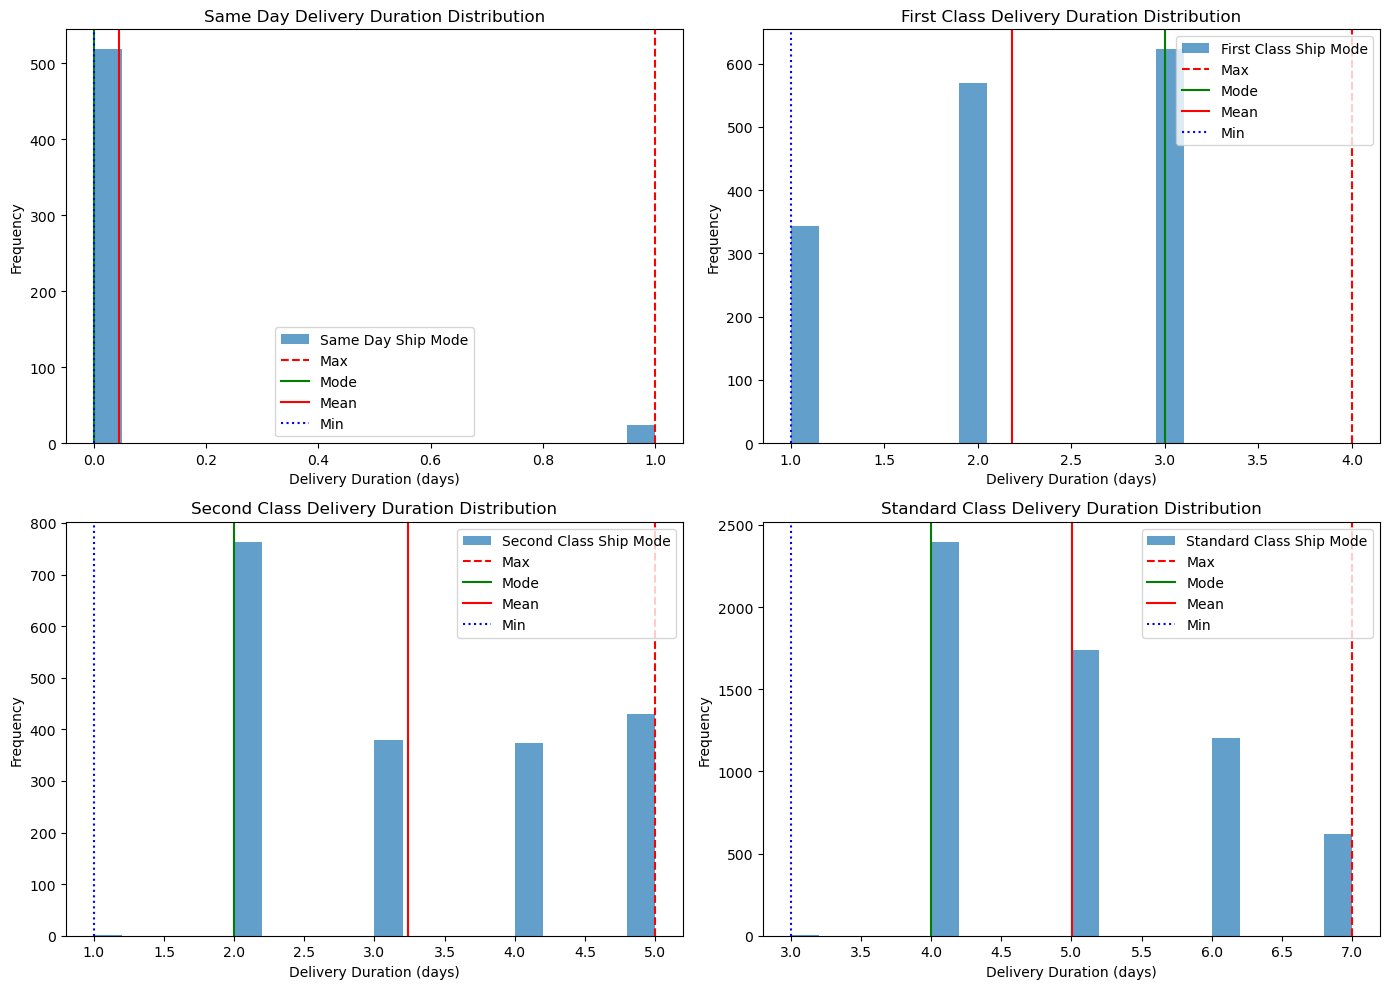

In [165]:
# Set up 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration
ship_modes = ['Same Day', 'First Class', 'Second Class', 'Standard Class']
orders_by_ship_mode = [Same_Day_orders, First_Class_orders, Second_Class_orders, Standard_Class_orders]

# Titles 
titles = ['Same Day', 'First Class', 'Second Class', 'Standard Class']

# Iterate each Ship Mode 
for i, orders in enumerate(orders_by_ship_mode):
    max_duration = orders['Delivery Duration'].max()
    mode_duration = orders['Delivery Duration'].mode()[0]    
    mean_duration = orders['Delivery Duration'].mean()
    min_duration = orders['Delivery Duration'].min()
    
    # Plot for delivery durations
    axes[i].hist(orders['Delivery Duration'].dropna(), bins=20, alpha=0.7, label=f'{titles[i]} Ship Mode')
    
    # Add lines for max, mode, and min
    axes[i].axvline(x=max_duration, color='r', linestyle='--', label='Max')
    axes[i].axvline(x=mode_duration, color='g', linestyle='-', label='Mode')
    axes[i].axvline(x=mean_duration, color='r', linestyle='-', label='Mean')
    axes[i].axvline(x=min_duration, color='b', linestyle=':', label='Min')
    
    # Titles & labels
    axes[i].set_title(f'{titles[i]} Delivery Duration Distribution')
    axes[i].set_xlabel('Delivery Duration (days)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Maximum of delivery duration for each Ship Mode

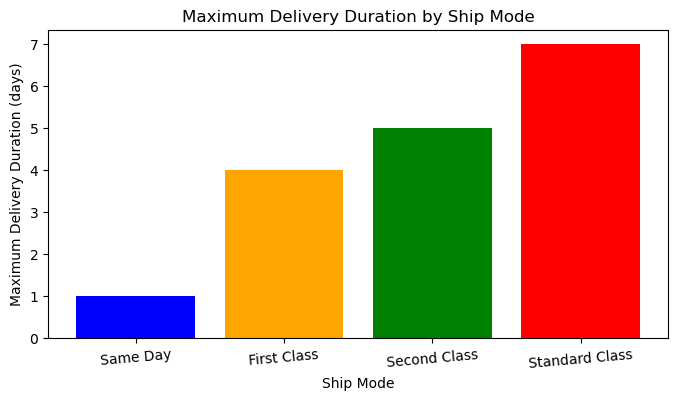

In [166]:
maximum_durations = {
    "Same Day": Same_Day_max_duration,
    "First Class": First_Class_max_duration,
    "Second Class": Second_Class_max_duration,
    "Standard Class": Standard_Class_max_duration
}

ship_modes = list(maximum_durations.keys())
maximum = list(maximum_durations.values())

plt.figure(figsize=(8, 4))
plt.bar(ship_modes, maximum, color=['blue', 'orange', 'green', 'red'])

plt.title('Maximum Delivery Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Maximum Delivery Duration (days)')
plt.xticks(rotation=5)
plt.show()

### Mean of delivery duration for each Ship Mode

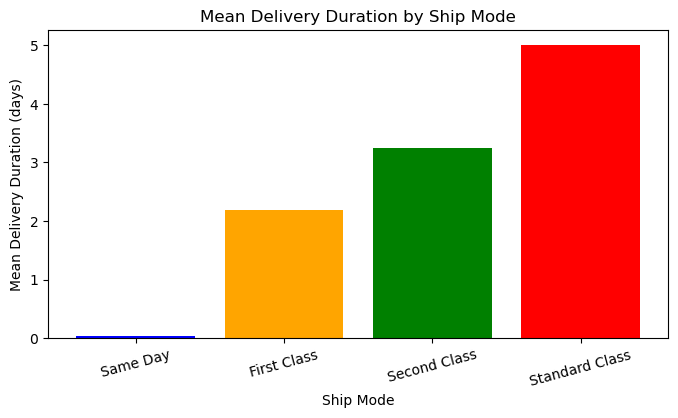

In [167]:
# Mean delivery duration for each Ship Mode
mean_durations = {
    "Same Day": Same_Day_mean_duration,
    "First Class": First_Class_mean_duration,
    "Second Class": Second_Class_mean_duration,
    "Standard Class": Standard_Class_mean_duration
}

ship_modes = list(mean_durations.keys())
means = list(mean_durations.values())

plt.figure(figsize=(8, 4))
plt.bar(ship_modes, means, color=['blue', 'orange', 'green', 'red'])

plt.title('Mean Delivery Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Mean Delivery Duration (days)')
plt.xticks(rotation=15)  
plt.show()

## To Merge df_Customer and df_Order into df_Customer_Order

In [168]:
df_Customer_Order = pd.merge(df_Customer[['Row ID','Customer ID', 'Customer Name', 'Segment','Country', 'City', 'State', 
                                          'Postal Code', 'Region']], 
                             df_Order[['Row ID','Order ID', 'Order Date', 'Ship Date', 'Ship Mode']], on='Row ID', how='inner')

In [169]:
#Check updated missing value in df_Customer_Order
df_Customer_Order_missing_values = df_Customer_Order.isnull().sum()
print(df_Customer_Order_missing_values)

Row ID           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Order ID         0
Order Date       1
Ship Date        0
Ship Mode        0
dtype: int64


In [170]:
# Filter df_Customer_Order to show rows with missing 'Order Date'
missing_order_date_rows = df_Customer_Order[df_Customer_Order['Order Date'].isnull()]
missing_order_date_rows[['Row ID', 'Order ID', 'Order Date', 'Ship Date','Ship Mode']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode
9321,4821,CA-2015-140025,NaT,2015-11-04,Standard Class


<span style="color: blue;">Fill in the missing 'Order Date' value by adding the mean of delivery duration, which is 5 days for the 'Standard Class' ship mode to the corresponding 'Ship Date'</span>

In [171]:
df_Customer_Order.loc[9321, 'Order Date'] = '2015-10-30'

# Display the specified columns for the updated row
df_Customer_Order.loc[[9321], ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode
9321,4821,CA-2015-140025,2015-10-30,2015-11-04,Standard Class


In [172]:
print(df_Customer_Order.dtypes)

Row ID                    int64
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
dtype: object


In [173]:
#Check updated missing value in df_Customer_Order
df_Customer_Order_missing_values = df_Customer_Order.isnull().sum()
print(df_Customer_Order_missing_values)

Row ID           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
dtype: int64


<span style="color: blue;">Every column in the df_Customer_Order is now complete with no missing values</span>

# To Merge df_Product_Sales with df_Customer_Order

In [174]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [175]:
print(df_Product_Sales.columns)

Index(['Row ID', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order ID', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [176]:
print(df_Customer_Order.columns)

Index(['Row ID', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode'],
      dtype='object')


In [177]:
df1 = pd.merge(df_Product_Sales[['Row ID','Product ID', 'Category', 'Sub-Category', 'Product Name',
    'Sales', 'Quantity', 'Discount', 'Profit']],df_Customer_Order, on='Row ID', how='inner')

In [178]:
print(df1.columns)

Index(['Row ID', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode'],
      dtype='object')


In [179]:
df1_missing_values = df1.isnull().sum()
print(df1_missing_values)

Row ID           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
dtype: int64


In [180]:
#df.head()
df1[df1['Row ID'].isin([8209, 8633, 7727, 5725])][['Row ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Row ID,Product ID,Sales,Quantity,Discount,Profit
2318,7727,OFF-ST-10002574,331.536,3,0.2,-82.884
2321,5725,OFF-ST-10002574,331.536,3,0.2,-82.884
6446,8209,OFF-BI-10000545,1369.764,6,0.7,-913.176
6453,8633,OFF-BI-10000545,1369.764,6,0.7,-913.176


<span style="color: blue;">'Row ID' after the merge matches the 'Row ID' before the merge</span>

In [181]:
print(df1.dtypes)

Row ID                    int64
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int32
Discount                float64
Profit                  float64
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
dtype: object


### Save cleaned version as a csv file

In [182]:
df1.to_csv('sample-superstore_2023_T3_clean.csv', index=False)

### Load cleaned version 

In [183]:
input_file1 = "sample-superstore_2023_T3_clean.csv"
df1 = pd.read_csv(input_file1, header = 0)
df1.head()

,Row ID,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Customer ID,...,Segment,Country,City,State,Postal Code,Region,Order ID,Order Date,Ship Date,Ship Mode
0,9798,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,2,0.4,-43.1178,CS-12490,...,Corporate,United States,Toledo,Ohio,43615,East,CA-2015-128608,2015-01-12,2015-01-17,Standard Class
1,5065,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742,CA-12265,...,Consumer,United States,Wilmington,Delaware,19805,East,CA-2017-122196,2017-09-22,2017-09-24,First Class
2,7502,TEC-PH-10004977,Technology,Phones,GE 30524EE4,470.376,3,0.2,52.9173,TC-21295,...,Consumer,United States,Westminster,California,92683,West,CA-2017-121048,2017-07-14,2017-07-18,Standard Class
3,9728,TEC-PH-10004977,Technology,Phones,GE 30524EE4,979.950,5,0.0,284.1855,KM-16720,...,Consumer,United States,Lowell,Massachusetts,1852,East,CA-2017-167395,2017-12-02,2017-12-04,First Class
4,582,TEC-PH-10004977,Technology,Phones,GE 30524EE4,470.376,3,0.2,52.9173,DV-13465,...,Consumer,United States,Denver,Colorado,80219,West,CA-2017-145233,2017-12-01,2017-12-05,Standard Class


In [184]:
print(df1.columns)

Index(['Row ID', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode'],
      dtype='object')


In [185]:
#Check updated missing value in df
df1.isnull().sum()

Row ID           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
dtype: int64

In [186]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])
print(df1.dtypes)

Row ID                    int64
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
dtype: object


## Univariate analysis & Visualization

### Distribution of Sales

In [187]:
sales_stats = df1['Sales'].describe()
sales_stats

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

### Distribution of Category

In [188]:
category_counts = df1['Category'].value_counts()
print(category_counts)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


### Distribution of Discount

In [189]:
discount_counts = df1['Discount'].value_counts()
print(discount_counts)

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64


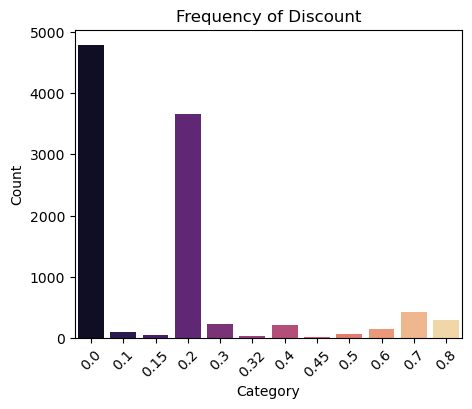

In [190]:
# cmap: viridis, plasma, magma, inferno, Blues,Greens, Greys, coolwarm, RdBu, Spectral, cividis, twilight
plt.figure(figsize=(5, 4))
sns.countplot(data=df1, x='Discount', palette='magma')
plt.title('Frequency of Discount')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Categories

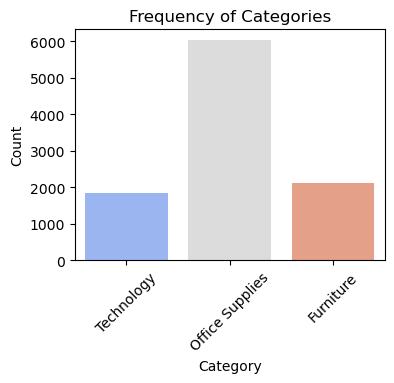

In [191]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df1, x='Category', palette='coolwarm')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Sub-Categories

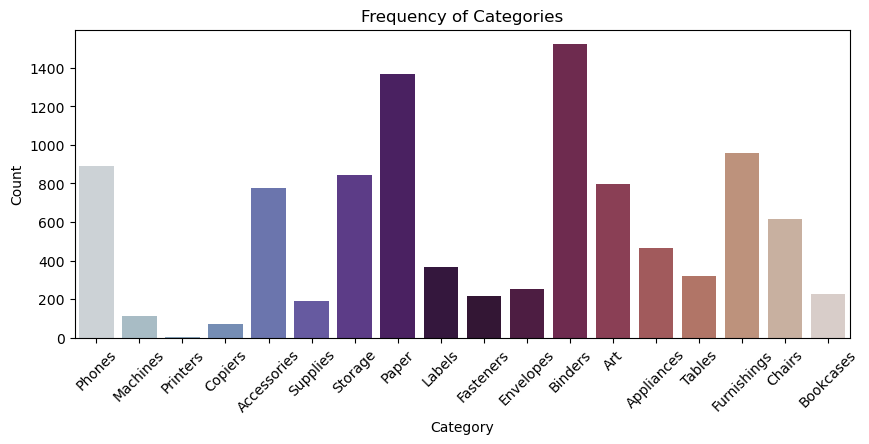

In [192]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df1, x='Sub-Category', palette='twilight')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Region

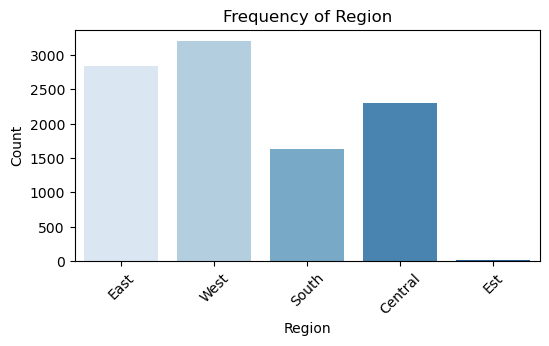

In [193]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, x='Region', palette='Blues')
plt.title('Frequency of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Segment

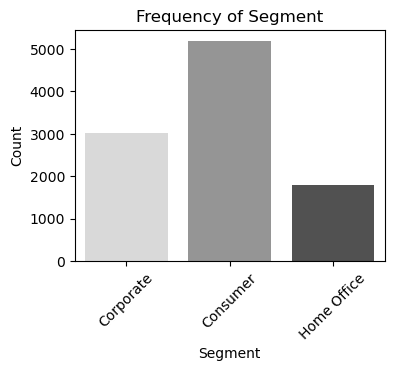

In [194]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df1, x='Segment', palette='Greys')
plt.title('Frequency of Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Removing Outliers and Normalizing


### Use z-score to identify and remove outliers in ['Sales', 'Quantity', 'Discount', 'Profit']

In [195]:
z_scores = zscore(df1[['Sales', 'Quantity', 'Discount', 'Profit']])
df1_no_outliers = df1[(abs(z_scores) < 3).all(axis=1)]

### Standardize/ Normalize/ Scaling the variables

In [196]:
scaler = MinMaxScaler() # Apply Min-Max scaling
numerical_vars = ['Sales', 'Quantity', 'Discount', 'Profit']
df1_no_outliers[numerical_vars] = scaler.fit_transform(df1_no_outliers[numerical_vars])
df1_no_outliers[numerical_vars].head(3)

,Sales,Quantity,Discount,Profit
0,0.112740,0.111111,0.571429,0.450216
1,0.188174,0.111111,0.000000,0.565907
2,0.225890,0.222222,0.285714,0.521077


## Descriptive Statistic

In [197]:
df1_no_outliers.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000
mean,4984.802459,0.085236,0.294663,0.194221,0.498942
std,2878.527850,0.140869,0.223277,0.249483,0.059542
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2483.750000,0.008202,0.111111,0.000000,0.483687
50%,4990.500000,0.025755,0.222222,0.142857,0.488583
75%,7462.250000,0.095801,0.444444,0.285714,0.503250
max,9994.000000,1.000000,1.000000,1.000000,1.000000


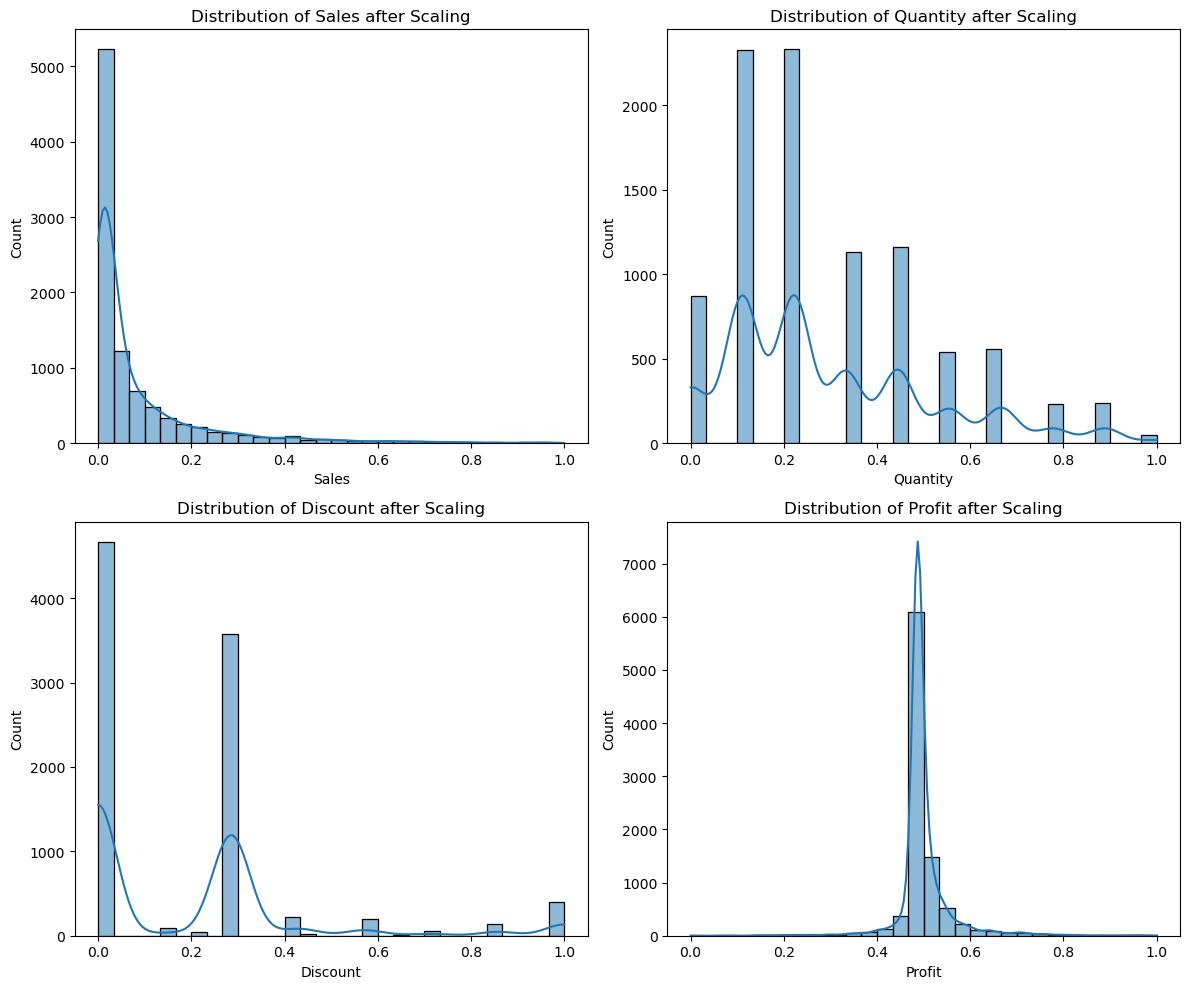

In [198]:
plt.figure(figsize=(12, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df1_no_outliers[var], bins=30, kde=True)
    plt.title(f'Distribution of {var} after Scaling')

plt.tight_layout()
plt.show()

## Correlation Analysis for Numerical Dataset

In [199]:
correlation_matrix = df1_no_outliers[numerical_vars].corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.253176 -0.010596  0.449966
Quantity  0.253176  1.000000  0.003297  0.119402
Discount -0.010596  0.003297  1.000000 -0.359503
Profit    0.449966  0.119402 -0.359503  1.000000


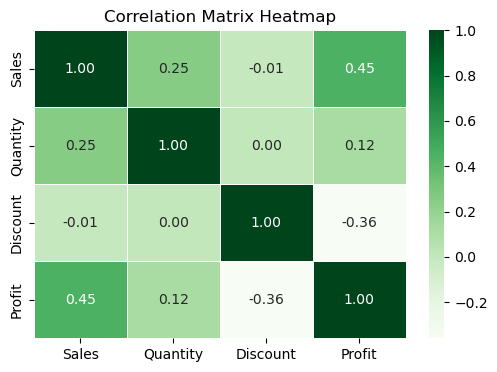

In [200]:
# Plotting the correlation heatmap
# cmap: viridis, plasma, magma, inferno, Blues,Greens, Greys, coolwarm, RdBu, Spectral, cividis, twilight

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Interpretation:

Discount and Profit (-0.359503): A moderate negative correlation between Discount and Profit. The higher discounts associated with lower profits. Discounts might increase sales volume or quantity, it may reduce profit margins.

Discount and Sales (-0.010596): Here is a negative correlation between Sales and Discount. Discounts may not have a strong direct impact on increasing sales volume.

Sales and Profit (0.449966): A moderate positive correlation between Sales and Profit.

# TASK 3

## Sumarization of the methods (200 words)

The dataset can be utilized for analysis about customer behavior,  providing valuable insights for optimizing efficiency and market strategies. For example to compare how much items were purchased at discount prices, compared to regular prices, the profit generate, to investigate consumer preferences by region, preferred shopping times (specific dates/months), and identifies the most profitable products. 

#### Bivariate Analysis
Several forms of bivariate analysis are likely performed to explore relationships between two variables at a time. This could include:

##### Numerical vs. Numerical Variables: 

Calculating correlation coefficients to identify the strength and direction of relationships between pairs of numerical variables, potentially visualized through scatter plots or regression lines.

##### Categorical vs. Numerical Variables: 

Analyzing how numerical outcomes, such as sales or profit, vary across different categories. This might involve grouping data by categorical variables and comparing means or sums, visualized through bar charts or pie carts..

##### Categorical vs. Categorical Variables: 

Examining the relationship between two categorical variables, potentially through cross-tabulation or stacked bar charts.

## Bivariate Analysis of Numerical vs Numerical Variables

### Discount vs Profit Relationship

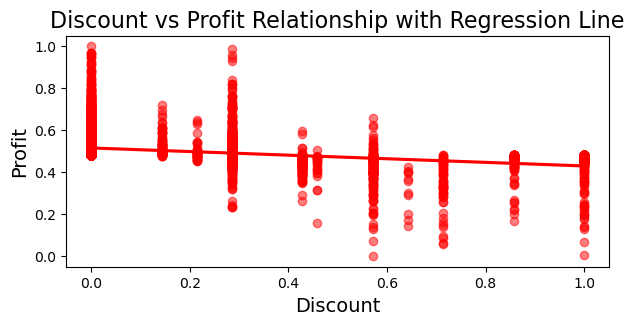

In [201]:
plt.figure(figsize=(7, 3))
sns.regplot(x='Discount', y='Profit', data=df1_no_outliers, color='red', scatter_kws={'alpha':0.5})

plt.title('Discount vs Profit Relationship with Regression Line', size=16)
plt.xlabel('Discount', size=14)
plt.ylabel('Profit', size=14)
plt.show()

<span style="color: red;"> Interpretation: Offering greater discounts does not lead to increased Profit</span>

### Discount vs Sales Relationship

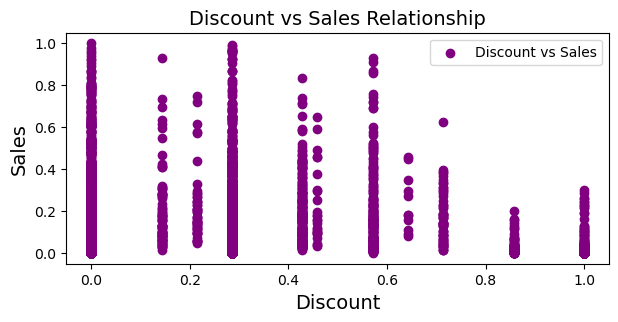

In [202]:
plt.rcParams["figure.figsize"] = [7, 3]
plt.scatter(df1_no_outliers['Discount'], df1_no_outliers['Sales'], color='purple', label='Discount vs Sales')
plt.title("Discount vs Sales Relationship", size=14)
plt.xlabel("Discount", size=14)
plt.ylabel("Sales", size=14)  
plt.legend()
plt.show()

<span style="color: purple;"> Interpretation: Providing higher discounts does not lead to increased sales.</span>

###  Sales vs Profit Relationship

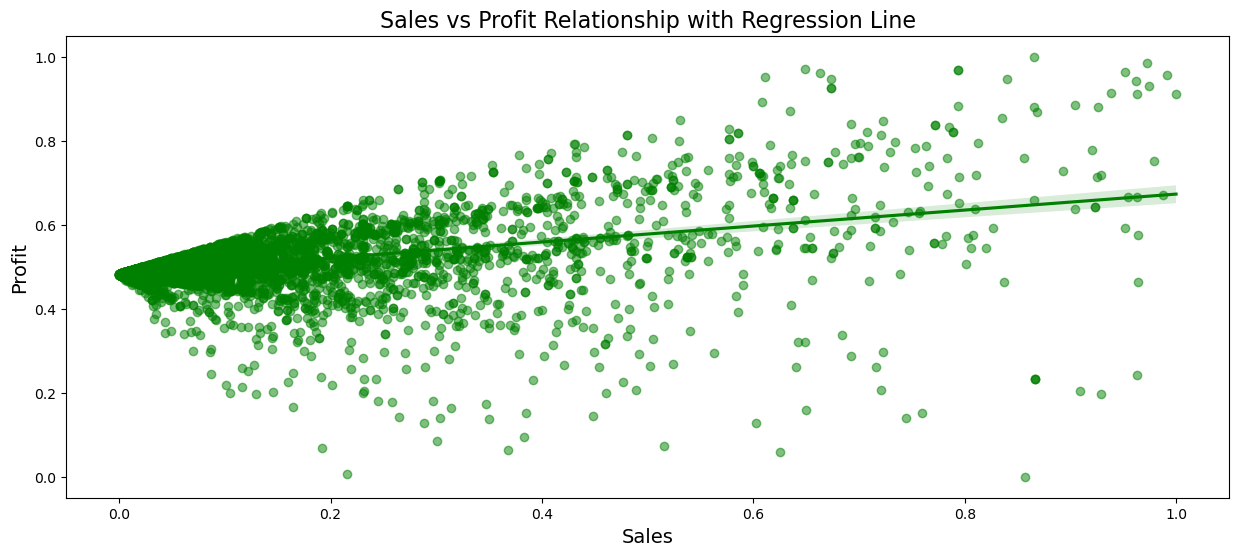

In [203]:
plt.figure(figsize=(15, 6))
sns.regplot(x='Sales', y='Profit', data=df1_no_outliers, color='green', scatter_kws={'alpha':0.5})

plt.title('Sales vs Profit Relationship with Regression Line', size=16)
plt.xlabel('Sales', size=14)
plt.ylabel('Profit', size=14)
plt.show()

<span style="color: green;"> Interpretation: As Sales increase, Profit tends to increase as well.</span>

### To investigate the preferred shopping times (specific dates/months)

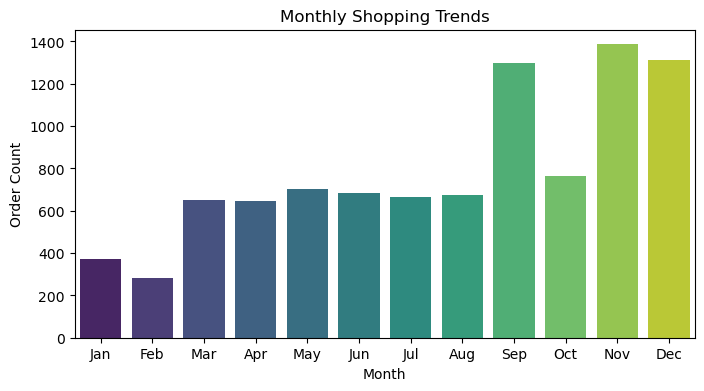

In [204]:
df1_no_outliers['Year_Order'] = df1_no_outliers['Order Date'].dt.year
df1_no_outliers['Month_Order'] = df1_no_outliers['Order Date'].dt.month
df1_no_outliers['Day_Order'] = df1_no_outliers['Order Date'].dt.day
monthly_trends = df1_no_outliers.groupby('Month_Order')['Order ID'].count().reset_index()
monthly_trends.columns = ['Month_Order', 'Order Count']
daily_trends = df1_no_outliers.groupby(['Year_Order', 'Month_Order', 'Day_Order'])['Order ID'].count().reset_index()
daily_trends.columns = ['Year', 'Month', 'Day', 'Order Count']
plt.figure(figsize=(8, 4))
sns.barplot(x='Month_Order', y='Order Count', data=monthly_trends, palette='viridis')
plt.title('Monthly Shopping Trends')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<span style="color: green;"> Interpretation: Most order in September, November, December.</span>

### Monthly Order by Year

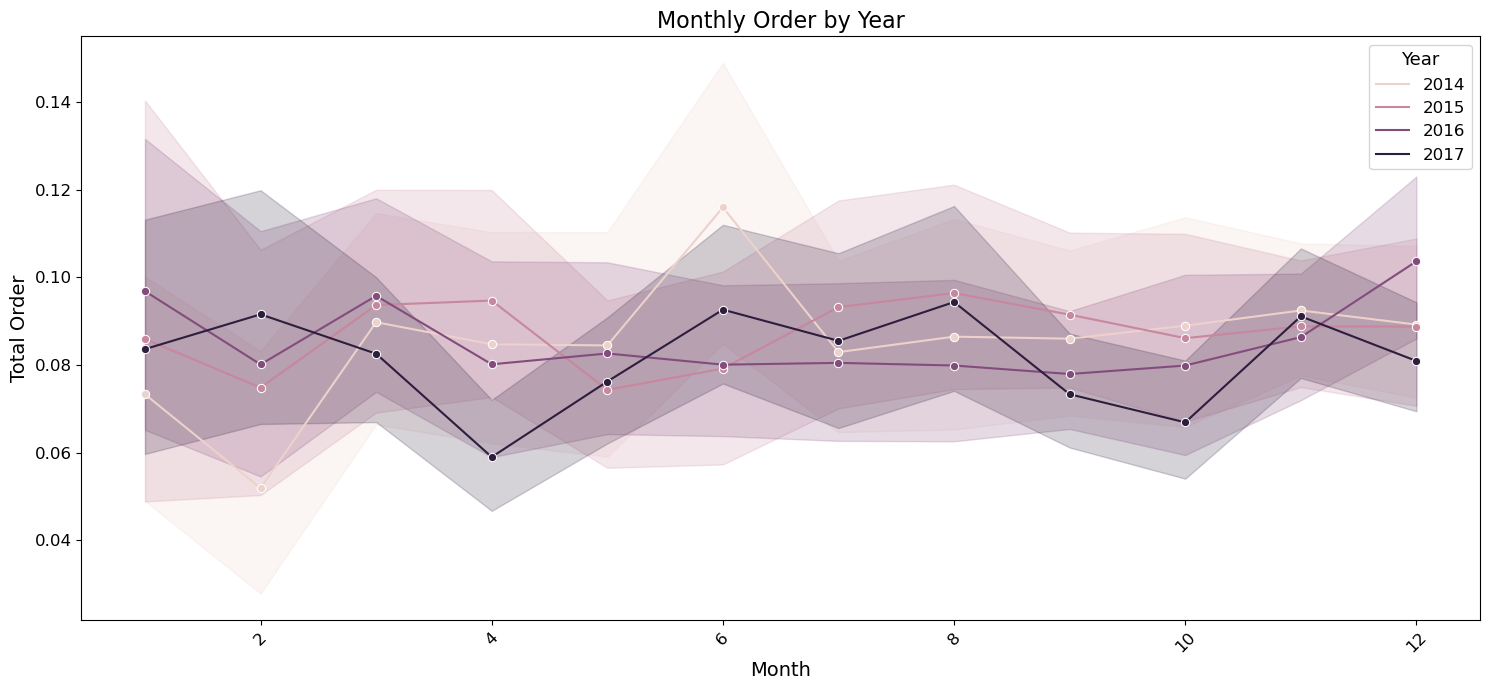

In [205]:
df1_no_outliers['Month_Order'] = pd.Categorical(df1_no_outliers['Month_Order'], ordered=True, 
                                        categories=sorted(df1_no_outliers['Month_Order'].unique()))
plt.figure(figsize=(15, 7))
sns.lineplot(data=df1_no_outliers, x='Month_Order', y='Sales', hue='Year_Order', marker='o')
plt.title('Monthly Order by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Order', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.show()

## Bivariate Analysis of Two Categorical Variables

### To find the most profitable 'Product Name' in each 'Region'

In [206]:
# Group by 'Region' and 'Product Name', summing up the profits
profit_by_product_region = df1_no_outliers.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()

# Sort the results within each 'Region' by 'Profit' in descending order to get the most profitable products at the top
profit_by_product_region_sorted = profit_by_product_region.sort_values(['Region', 'Profit'], ascending=[True, False])

# Drop duplicates keeping the first most profitable entry for each 'Region'
most_profitable_product_per_region = profit_by_product_region_sorted.drop_duplicates(subset=['Region'], keep='first')
most_profitable_product_per_region

,Region,Product Name,Profit
320,Central,Easy-staple paper,6.511216
2278,East,Staple envelope,8.448828
2543,Est,Catalog Binders with Expanding Posts,0.815133
2837,South,Easy-staple paper,4.490521
4767,West,Staples,6.319771


### Sales by Category in each Region

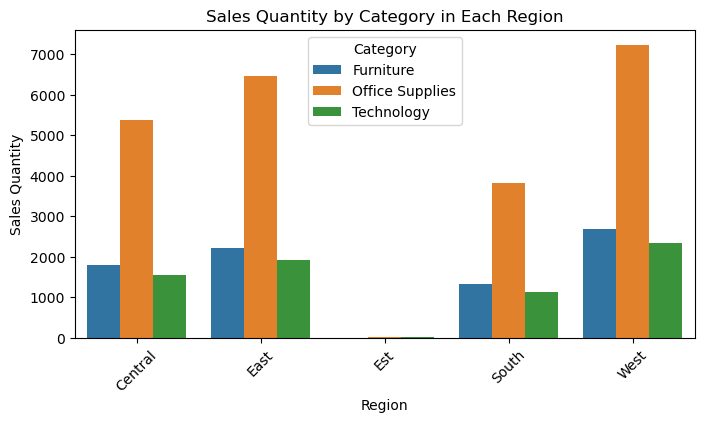

In [207]:
category_sales_region = df1.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()
#category_sales_region
plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Quantity', hue='Category', data=category_sales_region)
plt.title('Sales Quantity by Category in Each Region')
plt.ylabel('Sales Quantity')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

### Analyze Consumer Preferences for Discounts by Region

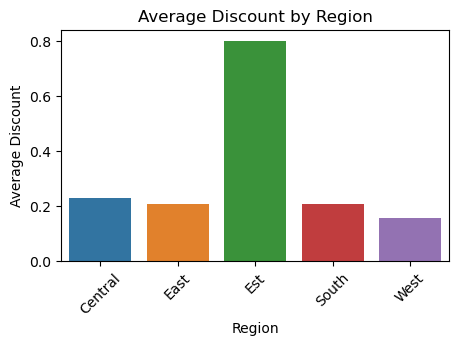

In [208]:
average_discount_region = df1_no_outliers.groupby('Region')['Discount'].mean().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='Region', y='Discount', data=average_discount_region)
plt.title('Average Discount by Region')
plt.ylabel('Average Discount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

### Distribution of Ship Modes Accross Segments

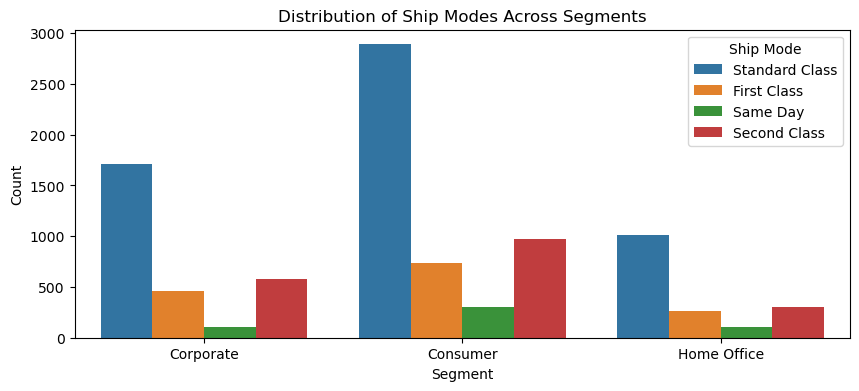

In [209]:
crosstab = pd.crosstab(df1_no_outliers['Segment'], df1['Ship Mode'])
#crosstab
plt.figure(figsize=(10, 4))
sns.countplot(x='Segment', hue='Ship Mode', data=df1_no_outliers)
plt.title('Distribution of Ship Modes Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.legend(title='Ship Mode')
plt.show()

<span style="color: green;">Interpretation: Standard Class is the preferred mode of shipping across all segments.</span>

## Bivariate Analysis of Categorical vs Numerical Variables

### Finding Sales by State

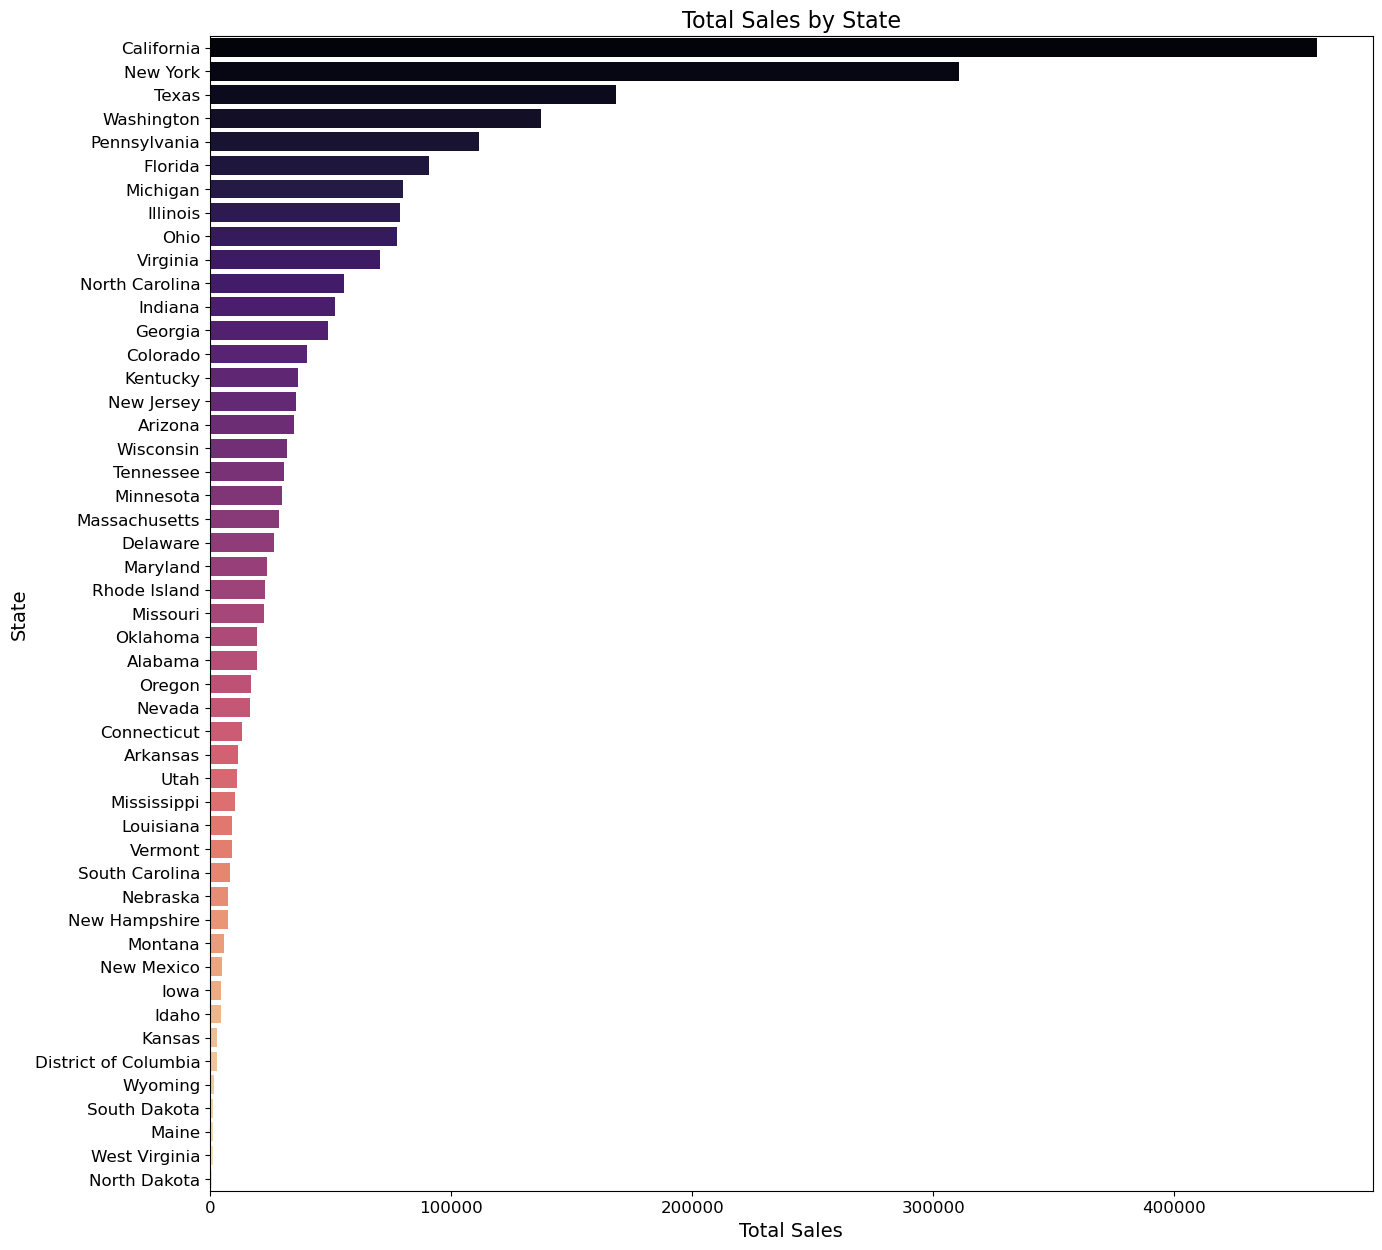

In [210]:
# Group the data by 'State' and sum the 'Sales'
sales_by_state = df1.groupby('State')['Sales'].sum().reset_index()

# Sort the results by 'Sales' in descending order
sales_by_state_sorted = sales_by_state.sort_values('Sales', ascending=False)

plt.figure(figsize=(15, 15))  
sns.barplot(x='Sales', y='State', data=sales_by_state_sorted, palette='magma')
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### To compare how much items were purchased at discount prices, compared to regular prices

In [211]:
# Count items purchased with a discount
discounted_items = df1_no_outliers[df1_no_outliers['Discount'] > 0]['Quantity'].sum()

# Count items purchased without a discount
regular_price_items = df1_no_outliers[df1_no_outliers['Discount'] == 0]['Quantity'].sum()

print(f"Items purchased at discount prices: {discounted_items}")
print(f"Items purchased at regular prices: {regular_price_items}")

Items purchased at discount prices: 1392.1111111111113
Items purchased at regular prices: 1388.3333333333335


<span style="color: green;"> Result: More items purchased at discount prices, compared to regular prices</span>

### To find the most profitable products

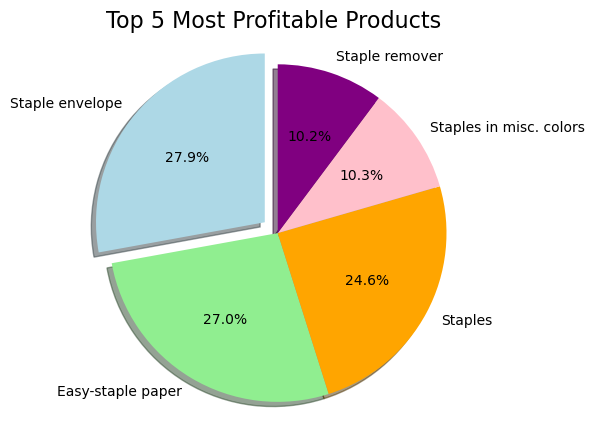

In [212]:
profit_by_product = df1_no_outliers.groupby('Product Name')['Profit'].sum().reset_index()
profit_by_product_sorted = profit_by_product.sort_values('Profit', ascending=False)

top_5_profitable_products = profit_by_product_sorted.head(5)

labels = top_5_profitable_products['Product Name']
sizes = top_5_profitable_products['Profit']
colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'purple']  # You can customize the colors as needed
explode = (0.1, 0, 0, 0, 0)  # Only "explode" the first slice (i.e., the most profitable product)

plt.figure(figsize=(5, 5))  # Adjust the figure size as necessary
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Top 5 Most Profitable Products', fontsize=16)
plt.axis('equal')  # ensures that pie is drawn as a circle.
plt.show()

### Finding Profit by Category

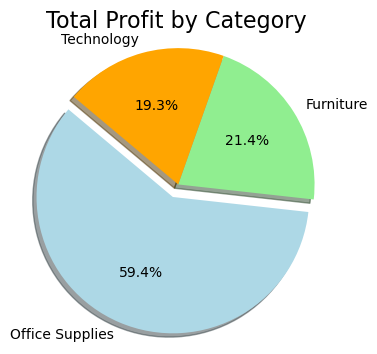

In [213]:
# Group the data by 'Category' and sum the 'Profit'
profit_by_category = df1_no_outliers.groupby('Category')['Profit'].sum().reset_index()

# Sort the results by 'Profit' in descending order
profit_by_category_sorted = profit_by_category.sort_values('Profit', ascending=False)

labels = profit_by_category_sorted['Category']
sizes = profit_by_category_sorted['Profit']

colors = ['lightblue', 'lightgreen', 'orange'] 
explode = (0.1, 0, 0) #Explode the largest Category

plt.figure(figsize=(4, 4))  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Profit by Category', fontsize=16)
plt.axis('equal')  
plt.show()

### Finding Sales by Category

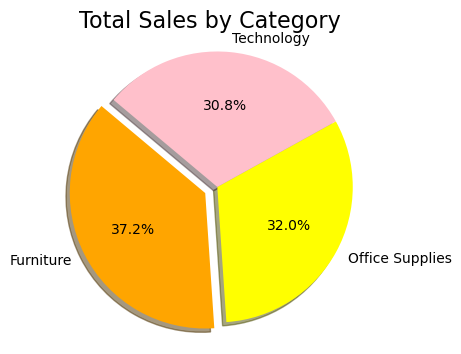

In [214]:
# Group the data by 'Category' and sum the 'Sales'
sales_by_category = df1_no_outliers.groupby('Category')['Sales'].sum().reset_index()

# Sort the results by 'Sales' in descending order
sales_by_category_sorted = sales_by_category.sort_values('Sales', ascending=False)

labels = sales_by_category_sorted['Category']
sizes = sales_by_category_sorted['Sales']

colors = ['orange', 'yellow', 'pink'] 
explode = (0.1, 0, 0) #Explode the largest Category

plt.figure(figsize=(4, 4))  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Sales by Category', fontsize=16)
plt.axis('equal')  
plt.show()

### Sales by States

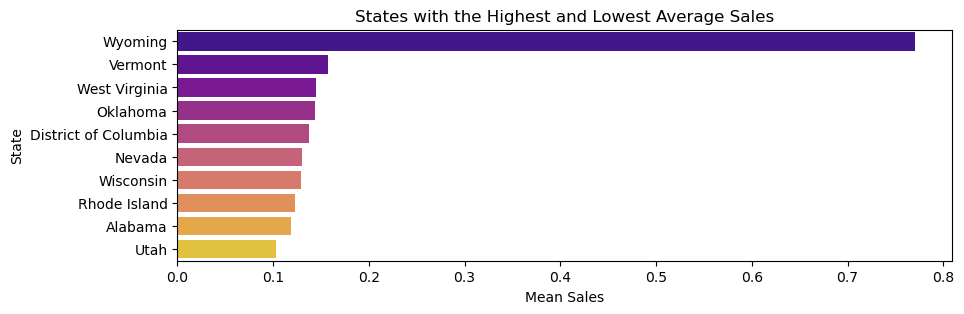

In [215]:
# Group by 'State' and calculate mean Sales
mean_sales_by_state = df1_no_outliers.groupby('State')['Sales'].mean().reset_index()

# Sort states by mean sales in descending order
mean_sales_by_state_sorted = mean_sales_by_state.sort_values('Sales', ascending=False)
top_state_by_mean_sales = mean_sales_by_state_sorted.head(10)
#top_state_by_mean_sales
plt.figure(figsize=(10, 3))
sns.barplot(x='Sales', y='State', data=top_state_by_mean_sales, palette='plasma')
plt.title('States with the Highest and Lowest Average Sales')
plt.xlabel('Mean Sales')
plt.ylabel('State')
plt.show()

### Order by Year

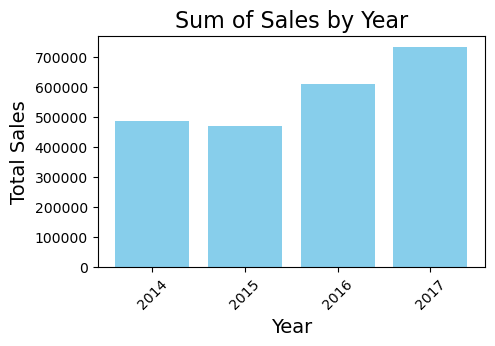

In [216]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
# Extract the year from 'Order Date'
df1['Year'] = df1['Order Date'].dt.year
# Group by 'Year' and sum 'Sales'
sales_by_year = df1.groupby('Year')['Sales'].sum().reset_index()
#sales_by_year

plt.figure(figsize=(5, 3))
plt.bar(sales_by_year['Year'].astype(str), sales_by_year['Sales'], color='skyblue')
plt.title('Sum of Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Furniture Sales by Year

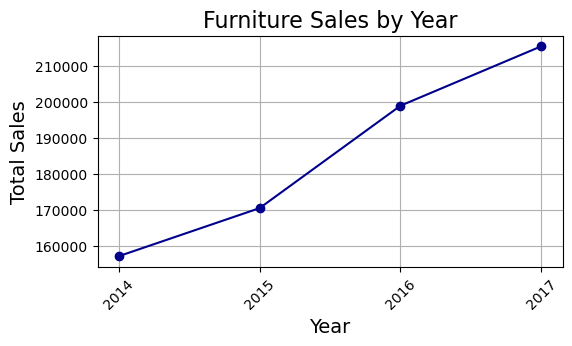

In [217]:
# Extract the year from 'Order Date'
df1['Year'] = df1['Order Date'].dt.year
# Filter for Furniture sales
furniture_sales = df1[df1['Category'] == 'Furniture']
# Group by 'Year' and sum 'Sales'
furniture_sales_by_year = furniture_sales.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(6, 3))
plt.plot(furniture_sales_by_year['Year'].astype(str), 
         furniture_sales_by_year['Sales'], marker='o', linestyle='-', color='darkblue')
plt.title('Furniture Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### To find the most profitable 'Product Name' in each 'Region'

In [218]:
# Group by 'Region' and 'Product Name', summing up the profits
profit_by_product_region = df1.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()

# Sort the results within each 'Region' by 'Profit' in descending order to get the most profitable products at the top
profit_by_product_region_sorted = profit_by_product_region.sort_values(['Region', 'Profit'], ascending=[True, False])

# Drop duplicates keeping the first most profitable entry for each 'Region'
most_profitable_product_per_region = profit_by_product_region_sorted.drop_duplicates(subset=['Region'], keep='first')
most_profitable_product_per_region

,Region,Product Name,Profit
283,Central,Canon imageCLASS 2200 Advanced Copier,8399.9760
1602,East,Canon imageCLASS 2200 Advanced Copier,10079.9712
2705,Est,GBC Recycled Grain Textured Covers,-22.7964
3084,South,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,3812.9700
4081,West,Canon imageCLASS 2200 Advanced Copier,6719.9808


### Profit by Region

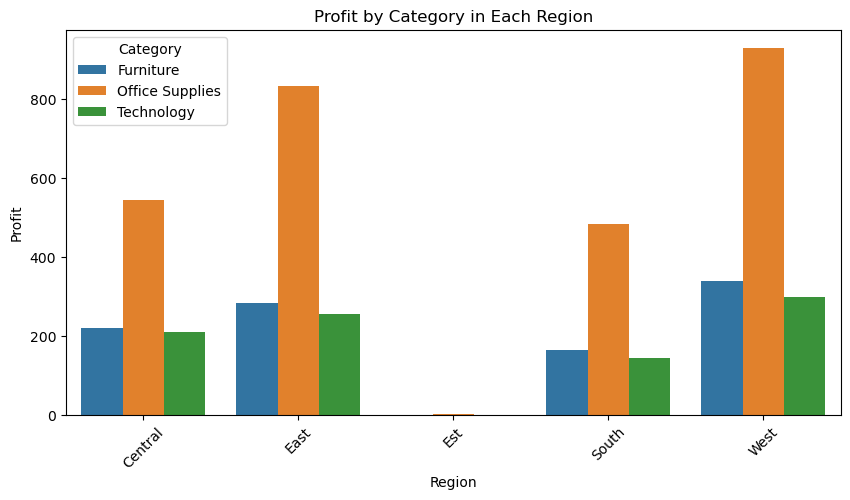

In [219]:
# Group data by 'Region' and 'Category' to see profit margins
profit_by_region = df1_no_outliers.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Profit', hue='Category', data=profit_by_region)
plt.title('Profit by Category in Each Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()